<h1>Table of Contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#import_libraries">Import Libraries</a></li>
        <li><a href="#import_dataset">Import "Online Retail" Dataset</a></li>
        <li><a href="#information">Information about the Dataset</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>
        <li><a href="#eda">Exploratory Data Analysis (EDA)</a></li> 
        <li><a href="#feature_engineering">Feature Engineering</a></li>                
    </ol>
</div>
<br>
<hr>

<div id="import_libraries"> 
    <h2>Import Libraries</h2>    
</div>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt  
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

<hr>
<div id="import_dataset"> 
    <h2>Import "Online Retail" Dataset</h2>         
</div>

### Overview of the Online Retail Dataset  

The **"Online Retail"** dataset is commonly used for data analysis in e-commerce, featuring the following attributes:  

- **InvoiceNo**: Unique transaction identifier, grouping items purchased together.  
- **StockCode**: Unique product identifier, useful for tracking sales and inventory.  
- **Description**: Textual description of products, aiding in understanding product types and preferences.  
- **Quantity**: Number of units sold in a transaction, important for analyzing sales volume.  
- **InvoiceDate**: Date and time of the transaction, crucial for time series and sales trend analysis.  
- **UnitPrice**: Price per unit, vital for revenue calculations and pricing strategies.  
- **CustomerID**: Unique customer identifier, valuable for customer behavior analysis and segmentation.  
- **Country**: Customer location, helping in geographic market analysis.  

### Uses of the Dataset  

1. **Sales Analysis**: Identifying bestsellers and trends.  
2. **Customer Segmentation**: Clustering based on buying behavior.  
3. **Inventory Management**: Optimizing stock levels and turnover.  
4. **Market Basket Analysis**: Understanding product bundling.  
5. **Predictive Modeling**: Forecasting future sales and behavior.  
6. **Time Series Analysis**: Modeling sales trends over time.  

With 541,909 observations, this dataset offers rich insights for informed decision-making in retail.

In [ ]:
# Load the dataset
or_df = pd.read_excel('Online_Retail.xlsx')

display(or_df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<hr>
<div id="information"> 
    <h2>Information about the Dataset</h2>    
</div>

In [3]:
# Get the shape of the dataset, which returns the number of rows and columns
shape_of_the_dataset = or_df.shape
print("\nThe shape of the dataset -->", shape_of_the_dataset)


The shape of the dataset --> (541909, 8)


In [4]:
# Show summary statistics for the dataset
# This includes count, mean, standard deviation, minimum, 25%, 50%, 75%, and maximum values for numeric columns
# This includes count, unique(the number of unique values), top(the mode) and the frequency of the top value for object columns
print('\nThe dataset description:\n')

data_describe = or_df.describe(include = 'all')
display(data_describe)


The dataset description:



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [5]:
# Display a concise summary of the dataset
# This summary includes the index dtype, column dtypes, non-null values, and memory usage 
print('\nMore information about the dataset:\n')

data_information = or_df.info()
display(data_information)


More information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


None

In [6]:
# Calculate the number of unique values in each column of the dataset
print('\nNumber of unique data in the dataset:\n')

unique_data = or_df.nunique()
print(unique_data)


Number of unique data in the dataset:

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


<hr>
<div id="pre-processing"> 
    <h2>Pre-processing</h2>    
</div>
<div>
    <ol>
        <li><a href="#convert_data_types">Convert Data Types</a></li>
        <li><a href="#duplicates">Duplicate Tuples</a></li>
        <li><a href="#missing_values">Handling Missing Values</a></li>
        <li><a href="#filter_out">Filter Out Unnecessary Data</a></li>        
        <li><a href="#outliers">Detecting Outliers (Noise)</a></li>                      
    </ol>
</div>
<br>

<hr>
<div id="convert_data_types"> 
    <h2>Convert Data Types</h2>    
</div>

In [7]:
# Convert 'StockCode' column to categorical
or_df['StockCode'] = or_df['StockCode'].astype('category')

# Convert 'Description' column to categorical   
or_df['Description'] = or_df['Description'].astype('category') 

# Convert 'Country' column to categorical
or_df['Country'] = or_df['Country'].astype('category')

# Convert 'CustomerID' column to string
or_df['CustomerID'] = or_df['CustomerID'].astype('category')

# Display the data types for each column after conversion
print("\nData types after conversion:")
display(or_df.dtypes)


Data types after conversion:


InvoiceNo              object
StockCode            category
Description          category
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID           category
Country              category
dtype: object

<hr>
<div id="duplicates"> 
    <h2>Duplicate Tuples</h2>    
</div>

In [8]:
# Calculate the number of duplicate rows in the dataframe
Num_of_duplicate_rows = or_df.duplicated().sum()
print("\nThe number of duplicate rows -->", Num_of_duplicate_rows)


The number of duplicate rows --> 5268


In [9]:
# Identify all duplicated rows in the dataframe  
# 'duplicated(keep=False)' marks all duplicates (including the first occurrence as True)
df_all_duplicate = or_df[or_df.duplicated(keep=False)]
print("\nAll the rows and their duplicates:\n")
display(df_all_duplicate)


All the rows and their duplicates:



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [10]:
# Identify only the duplicated rows in the dataframe
# 'duplicated()' without any parameters, meaning its output only shows the rows that are duplicates and excludes the first occurrences
duplicate = or_df[or_df.duplicated()]
print("\nJust duplicate rows:\n")
display(duplicate)


Just duplicate rows:



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [11]:
# Drop all duplicate rows from the dataframe
# df_ADD --> df_after dropping duplicates
df_ADD = or_df.drop_duplicates()
print("\nThe dataset after dropping the duplicate tuples:\n")
display(df_ADD)


The dataset after dropping the duplicate tuples:



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [12]:
# Check the shape to see how many duplicate rows were removed  
print(f'Dataset shape before dropping rows: {or_df.shape}')
print(f'Dataset shape after dropping rows: {df_ADD.shape}')

Dataset shape before dropping rows: (541909, 8)
Dataset shape after dropping rows: (536641, 8)


<hr>
<div id="missing_values"> 
    <h2>Handling Missing Values</h2>    
</div>
<div>
    <ol>
        <li><a href="#bf_ff">Backward Fill (bfill) and Forward Fill (ffill) methods</a></li>
        <li><a href="#mode">The Mode Method</a></li>
        <li><a href="#combination">Combination of Both Methods</a></li>             
        <li><a href="#output">Output the results</a></li>    
    </ol>
</div>
<br>

In [13]:
# Check for missing values in the dataframe
isna = pd.DataFrame(df_ADD.isna().sum(axis=0))
print(isna)

                  0
InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID   135037
Country           0


In [14]:
# Find missing values ​​in other shapes
# Define unwanted values and consider them as null/missing  
unwanted_values = ['?', '!', '$', 'None', 'null', '', '*'] 

# Replace unwanted values with NaN   
for col in df_ADD.columns: 
    df_ADD.loc[:, col] = df_ADD[col].replace(unwanted_values, np.nan)

In [15]:
# Check for any NaN values now present in the dataframe  
missing_values_count = df_ADD.isna().sum() 

# Display the count of missing values for each column  
print("\nCount of missing values in each column:")  
print(missing_values_count[missing_values_count > 0])


Count of missing values in each column:
Description      1501
CustomerID     135037
dtype: int64


In [16]:
# Summary of missing data (percentage of missing values)
missing_summary = df_ADD.isnull().mean() * 100
print(f"\nPercentage of missing values in each column:\n{missing_summary}")


Percentage of missing values in each column:
InvoiceNo       0.000000
StockCode       0.000000
Description     0.279703
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64


In [17]:
# Display rows with missing values  
rows_with_missing = df_ADD[df_ADD.isna().any(axis=1)]  
print("\nRows with missing values:")  
display(rows_with_missing)


Rows with missing values:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


<div id="bf_ff"> 
    <h2>Backward Fill (bfill) and Forward Fill (ffill) methods</h2>    
</div>

In [18]:
# Fill missing values in 'description' and 'customerID' using forward fill and backward fill
df_fill = df_ADD.copy()              # Create a copy of the dataframe
  
df_fill['Description'] = df_fill['Description'].fillna(method='ffill').fillna(method='bfill')  
df_fill['CustomerID'] = df_fill['CustomerID'].fillna(method='ffill').fillna(method='bfill')  

# Check if there are still any missing values  
print(df_fill[['Description', 'CustomerID']].isnull().sum())  

Description    0
CustomerID     0
dtype: int64


<div id="mode"> 
    <h2>The Mode Method</h2>    
</div>

In [19]:
# Create a copy of the dataframe
df_mode = df_ADD.copy()

# Impute missing values in 'Description' column with the mode
mode_description = df_mode['Description'].mode()[0]
df_mode['Description'].fillna(mode_description, inplace=True)

# Impute missing values in 'CustomerID' column with the mode
mode_customer_id = df_mode['CustomerID'].mode()[0]
df_mode['CustomerID'].fillna(mode_customer_id, inplace=True)

# Verify the imputation
print(df_mode[['Description', 'CustomerID']].isnull().sum())

Description    0
CustomerID     0
dtype: int64


<div id="combination"> 
    <h2>Combination of Both Methods</h2>    
</div>

### Rationale for Combining Mode and Forward/Backward Fill Methods

This project focuses on gaining insights into customer behavior, sales performance, and product trends. While imputation methods for missing values can impact data quality, the 'Description' and 'CustomerID' columns hold varying levels of importance relative to our primary analysis.
To ensure clarity and robustness in data preprocessing, the following approach was adopted:

1. **Mode Imputation for 'Description'**: Given that the 'Description' column had fewer missing values and is less critical for the primary analysis, the mode imputation method was used. This ensures consistency by replacing missing values with the most frequently occurring category.
2. **Forward/Backward Fill for 'CustomerID'**: The 'CustomerID' column had a significant number of missing values. Using the forward fill and backward fill methods helps avoid over-representation of a single customer ID, maintaining the temporal relevance and contextual accuracy of our data.

By documenting and comparing these methods, the goal is to provide a comprehensive view of the imputation techniques used, allowing for better decision-making and transparency in this analysis.

In [20]:
# Create a copy of the dataframe
df_combined = df_ADD.copy()

# Impute missing values in 'Description' column with the mode
mode_description = df_combined['Description'].mode()[0]
df_combined['Description'].fillna(mode_description, inplace=True)

# Impute missing values in 'CustomerID' column using forward fill, then backward fill
df_combined['CustomerID'].fillna(method='ffill', inplace=True)
df_combined['CustomerID'].fillna(method='bfill', inplace=True)

# Verify the imputation
print(df_combined[['Description', 'CustomerID']].isnull().sum())

Description    0
CustomerID     0
dtype: int64


<div id="output"> 
    <h2>Output the results</h2>    
</div>

In [21]:
# Descriptive Statistics: Check summary statistics for each dataset to see if there are significant differences
print('\nBaseline outcome: \n')  
display(df_ADD.describe())

print('\nForward Fill/Backward Fill method outcome: \n') 
display(df_fill.describe())
 
print('\nThe mode method outcome: \n')
display(df_mode.describe())

print('\nCombination of both methods outcome: \n')
display(df_combined.describe())


Baseline outcome: 



,Quantity,InvoiceDate,UnitPrice
count,536641.000000,536641,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 10:52:00,1.250000
50%,3.000000,2011-07-19 14:04:00,2.080000
75%,10.000000,2011-10-18 17:05:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,219.130156,NaN,97.233118



Forward Fill/Backward Fill method outcome: 



,Quantity,InvoiceDate,UnitPrice
count,536641.000000,536641,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 10:52:00,1.250000
50%,3.000000,2011-07-19 14:04:00,2.080000
75%,10.000000,2011-10-18 17:05:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,219.130156,NaN,97.233118



The mode method outcome: 



,Quantity,InvoiceDate,UnitPrice
count,536641.000000,536641,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 10:52:00,1.250000
50%,3.000000,2011-07-19 14:04:00,2.080000
75%,10.000000,2011-10-18 17:05:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,219.130156,NaN,97.233118



Combination of both methods outcome: 



,Quantity,InvoiceDate,UnitPrice
count,536641.000000,536641,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 10:52:00,1.250000
50%,3.000000,2011-07-19 14:04:00,2.080000
75%,10.000000,2011-10-18 17:05:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,219.130156,NaN,97.233118


In [22]:
print("\nContinue working with Combination of both methods after comparing different methods:\n")
display(df_combined.head())


Continue working with Combination of both methods after comparing different methods:



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<hr>
<div id="filter_out"> 
    <h2>Filter Out Unnecessary Data</h2>    
</div>

In [23]:
# Filter out negative quantities
df_filter_out = df_combined.copy()              # Create a copy of the dataframe
df_filter_out = df_filter_out[df_filter_out['Quantity'] > 0]
df_filter_out = df_filter_out[df_filter_out['UnitPrice'] > 0]

In [24]:
# Check the shape to see how many rows were filtered out
print(f'Dataset shape before filter out: {df_combined.shape}')
print(f'Dataset shape after filter out: {df_filter_out.shape}')

Dataset shape before filter out: (536641, 8)
Dataset shape after filter out: (524878, 8)


<hr>
<div id="outliers"> 
    <h2>Detecting Outliers (Noise)</h2>    
</div>
<div>
    <ol>
        <li><a href="#plot_boxplot">Plot Boxplot</a></li>
        <li><a href="#z_score">Z-score method</a></li>          
    </ol>
</div>
<br>

<div id="plot-boxplot"> 
    <h2>Plot Boxplot</h2>    
</div>

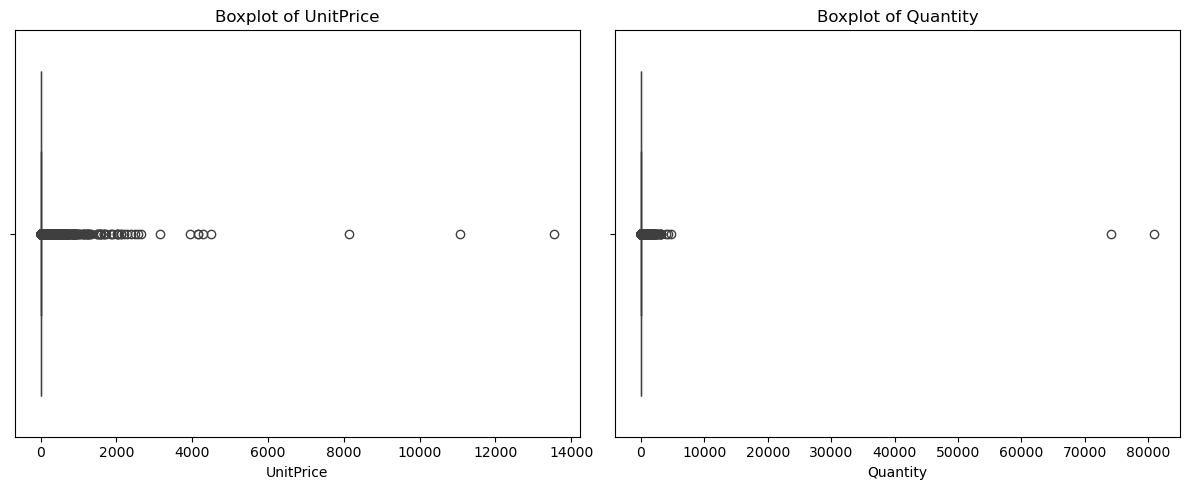

In [25]:
# Plot a boxplot to detect outliers in numerical features  
# Set up the figure with 1 row and 2 columns for boxplots, sharing the y-axis
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)        # Set the figure size (width, height)

# Create the first boxplot for 'UnitPrice'
sns.boxplot(x='UnitPrice', data=df_filter_out, ax=axes[0], 
            boxprops=dict(facecolor='#d62728', alpha=0.6))
axes[0].set_title('Boxplot of UnitPrice')

# Create the second boxplot for 'Quantity'
sns.boxplot(x='Quantity', data=df_filter_out, ax=axes[1], 
            boxprops=dict(facecolor='#1f77b4', alpha=0.6))
axes[1].set_title('Boxplot of Quantity')

plt.tight_layout()         # Adjust the spacing between plots
plt.show() 
  

<div id="z_score"> 
    <h2>Z-score method</h2>    
</div>

In [26]:
# Create a copy of the dataset
df_zscore = df_filter_out.copy()                    

# Calculate Z-scores for the specified columns  
# Z-score indicates how many standard deviations an element is from the mean
z_scores = stats.zscore(df_zscore[['Quantity', 'UnitPrice']])  

In [27]:
# Create a new column 'is_outlier' in the dataset  
# Set it to True if any Z-score for the row is greater than 3 or less than -3  
# This indicates that the row is an outlier in at least one of the two columns  
df_zscore['is_outlier'] = (abs(z_scores) > 3).any(axis=1) 

In [28]:
# Filter the dataset to show only the rows that are identified as outliers  
outliers_only = df_zscore[df_zscore['is_outlier']]   

# Output of the outliers  
display(outliers_only) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,is_outlier
246,536392,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,1,2010-12-01 10:29:00,165.00,13705.0,United Kingdom,True
730,536437,17021,NAMASTE SWAGAT INCENSE,600,2010-12-01 12:12:00,0.24,13694.0,United Kingdom,True
870,536477,21137,BLACK RECORD COVER FRAME,480,2010-12-01 12:27:00,3.39,16210.0,United Kingdom,True
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,17841.0,United Kingdom,True
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,14606.0,United Kingdom,True
...,...,...,...,...,...,...,...,...,...
540070,581458,22197,POPCORN HOLDER,1500,2011-12-08 18:45:00,0.72,17949.0,United Kingdom,True
540071,581459,22197,POPCORN HOLDER,1200,2011-12-08 18:46:00,0.72,17949.0,United Kingdom,True
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,True
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,12433.0,United Kingdom,True


In [29]:
# Dataframe after removing outliers  
df_zscore = df_zscore[~df_zscore['is_outlier']]                # Use bitwise NOT to select non-outlier rows  

# Reset the index of the final dataset for cleaner indexing  
df_zscore.reset_index(drop=True, inplace=True)
df_zscore = df_zscore.drop('is_outlier', axis=1)               # Drop 'is_outlier' column

# Display the dataset after removing outliers 
display(df_zscore.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [30]:
# Output the shape of the dataset after outlier detection
print(f'Dataset shape before removing outliers: {df_filter_out.shape}')
print(f'Dataset shape after removing outliers: {df_zscore.shape}')

Dataset shape before removing outliers: (524878, 8)
Dataset shape after removing outliers: (523577, 8)


<hr>
<div id="eda"> 
    <h2>Exploratory Data Analysis (EDA)</h2>    
</div>
<div>
    <ol>
        <li><a href="#visualize_data_distributions">Visualize Data Distributions</a></li>
        <li><a href="#explore_relationships">Explore Relationships</a></li>       
        <li><a href="#analyze_trends">Analyze Trends</a></li>
        <li><a href="#cohort_analysis">Cohort Analysis</a></li>
        <li><a href="#time_based_heatmap">Time-based Heatmap</a></li>        
        <li><a href="#seasonal_holiday_trends_analysis">Seasonal & Holiday Trends Analysis</a></li>                          
    </ol>
</div>
<br>

<div id="visualize_data_distributions"> 
    <h2>Visualize Data Distributions</h2>    
</div>

### Numerical Features 

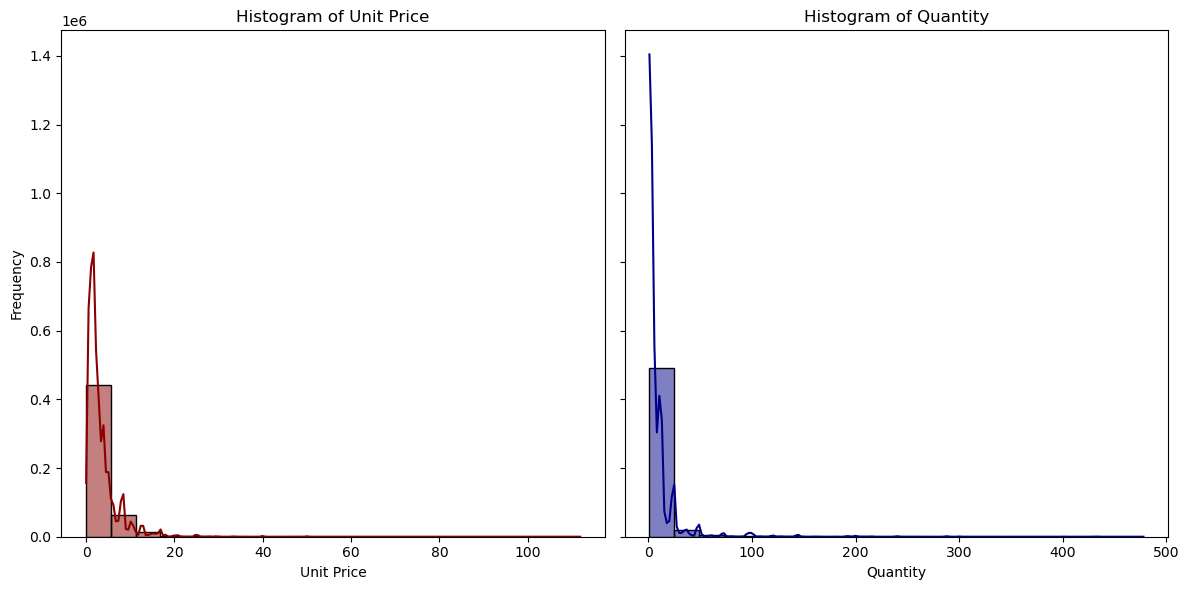

In [31]:
# Plot a histogram for numerical features
# Set up the figure with 1 row and 2 columns for histograms, sharing the y-axis  
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)                      # Set the figure size (width, height)

# Create the first histogram for 'UnitPrice'
sns.histplot(df_zscore['UnitPrice'], bins=20, kde=True, color='darkred', ax=axes[0])   # Create histogram for UnitPrice with KDE
axes[0].set_title('Histogram of Unit Price')
axes[0].set_xlabel('Unit Price')
axes[0].set_ylabel('Frequency')   

# Create the second histogram for 'Quantity' 
sns.histplot(df_zscore['Quantity'], bins=20, kde=True, color='darkblue', ax=axes[1])   # Create histogram for Quantity with KDE
axes[1].set_title('Histogram of Quantity')
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('Frequency')  
  
plt.tight_layout()           # Adjust the spacing between plots 
plt.show()   

### Categorical Features

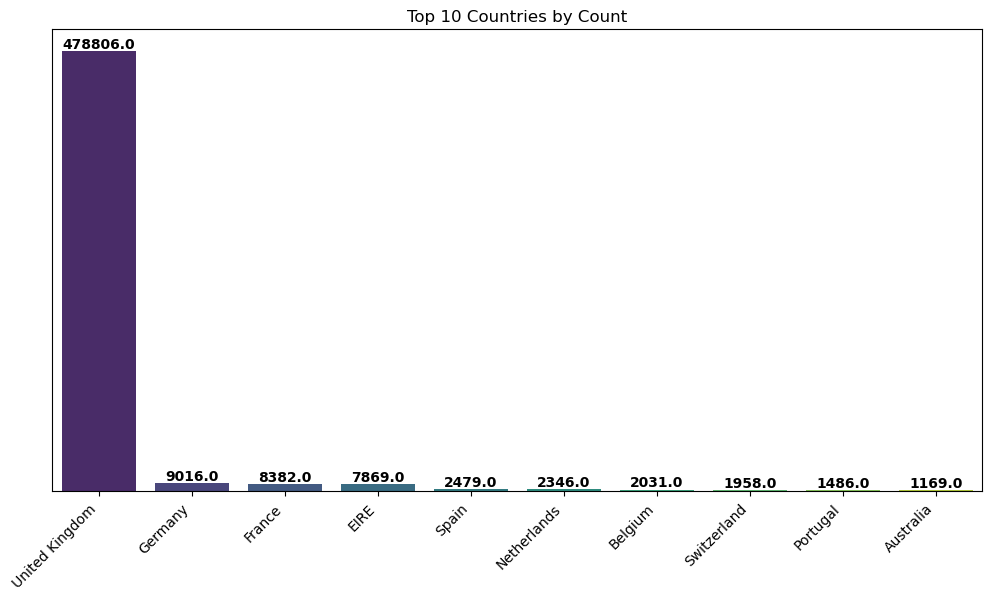

In [32]:
# Plot a bar chart for categorical features --> Country
# Count occurrences of each country and sort in descending order  
country_counts = df_zscore['Country'].value_counts().reset_index()  
country_counts.columns = ['Country', 'Count']                             # Rename columns  
country_counts = country_counts.sort_values(by='Count', ascending=False)  # Sort by count

# Number of top countries to display (top 10)
top_n = 10  
country_counts = country_counts.head(top_n)

# Set the figure size (width, height)  
plt.figure(figsize=(12, 6)) 
# Create a bar plot for 'Country' counts
ax = sns.barplot(data=country_counts, x='Country', y='Count', palette='viridis', order=country_counts['Country'])   

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')    

# Set title and labels  
plt.title(f'Top {top_n} Countries by Count')    
plt.xlabel('')
plt.ylabel('')
ax.set_yticks([]) 
plt.xticks(rotation=45, ha='right')         # Rotate x-axis labels for better readability   
plt.show()   

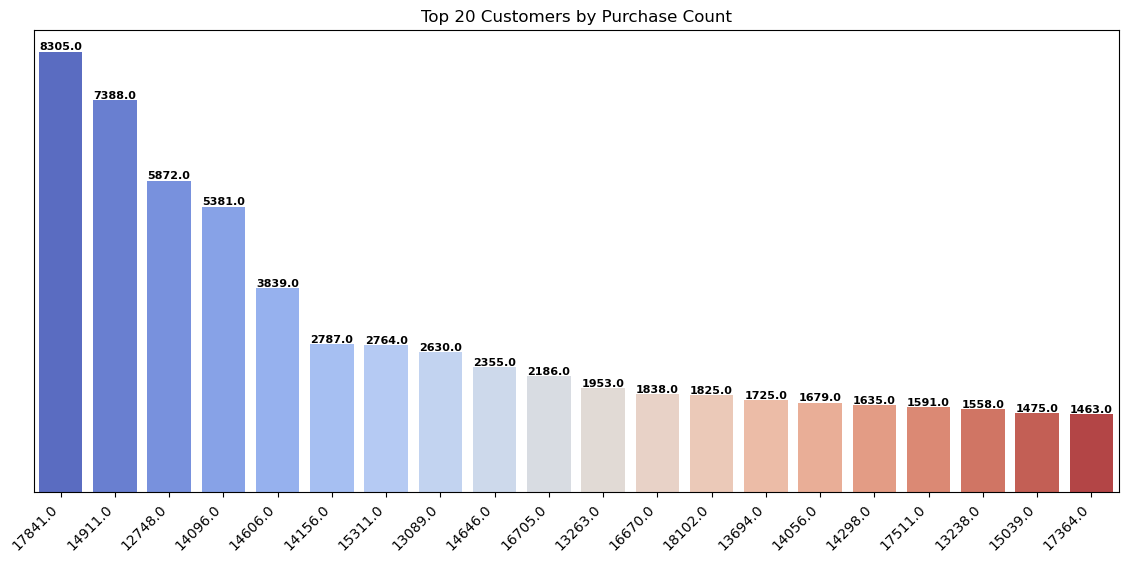

In [33]:
# Plot a bar chart for categorical features --> CustomerID
# Count occurrences of each CustomerID and sort in descending order
customer_counts = df_zscore['CustomerID'].value_counts().reset_index()
customer_counts.columns = ['CustomerID', 'Count']           # Rename columns
customer_counts = customer_counts.sort_values(by='Count', ascending=False).head(20)    # Keep top 20 customers

# Set the figure size
plt.figure(figsize=(14, 6))
# Create a bar plot for 'CustomerID' counts
ax = sns.barplot(data=customer_counts, x='CustomerID', y='Count', palette='coolwarm', order=customer_counts['CustomerID'])

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black', fontweight='bold')  

# Set title and labels
plt.title('Top 20 Customers by Purchase Count')  
plt.xlabel('')
plt.ylabel('')
ax.set_yticks([])
plt.xticks(rotation=45, ha='right')       # Rotate x-axis labels for better readability
plt.show()

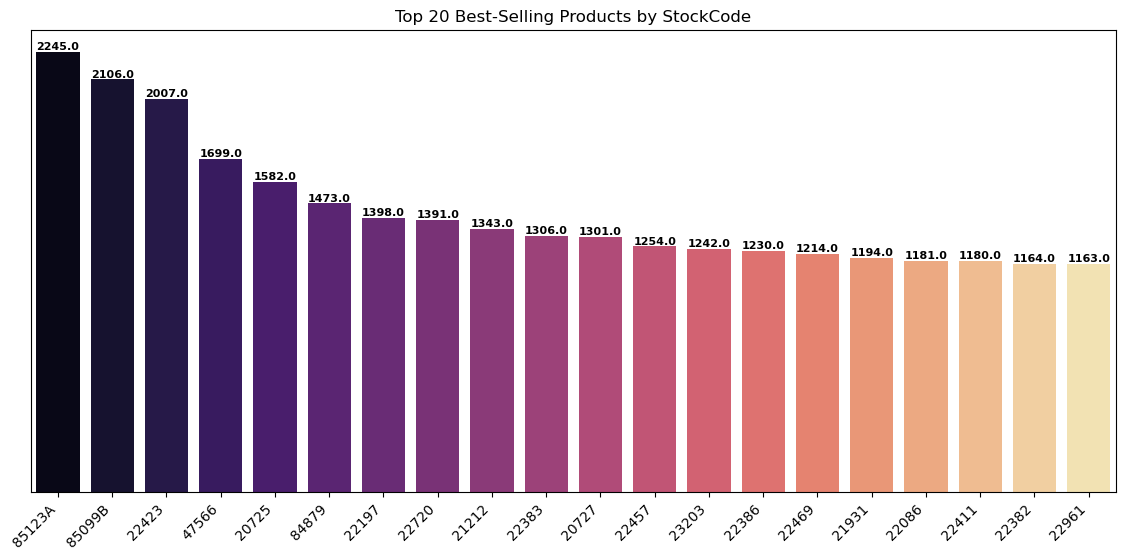

In [34]:
# Plot a bar chart for categorical features --> StockCode
# Count occurrences of each StockCode and sort in descending order
stock_counts = df_zscore['StockCode'].value_counts().reset_index()
stock_counts.columns = ['StockCode', 'Count']         # Rename columns
stock_counts = stock_counts.sort_values(by='Count', ascending=False).head(20)    # Keep top 20 best-selling products

# Set the figure size
plt.figure(figsize=(14, 6))
# Create a bar plot for 'StockCode' counts
ax = sns.barplot(data=stock_counts, x='StockCode', y='Count', palette='magma', order=stock_counts['StockCode'])

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black', fontweight='bold')

# Set title and labels
plt.title('Top 20 Best-Selling Products by StockCode')  
plt.xlabel('')
plt.ylabel('')
ax.set_yticks([])
plt.xticks(rotation=45, ha='right')       # Rotate x-axis labels for better readability
plt.show()

<div id="explore_relationships"> 
    <h2>Explore Relationships</h2>    
</div>

### Numerical Features

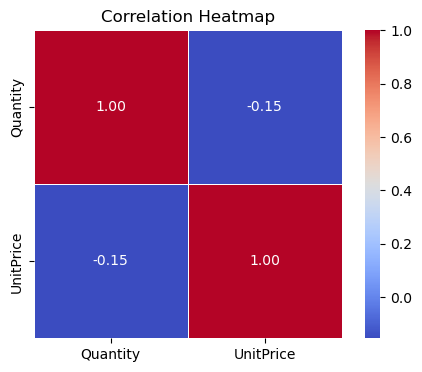

In [35]:
# Plot a heatmap to explore relationships between variables --> Quantity & UnitPrice
# Compute the correlation matrix
correlation_matrix = df_zscore[['Quantity', 'UnitPrice']].corr()

# Set the figure size
plt.figure(figsize=(6, 4))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)

# Set title
plt.title('Correlation Heatmap')
plt.show()

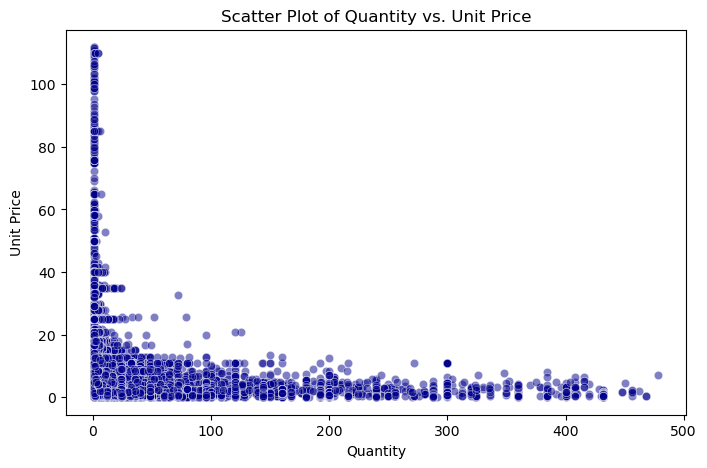

In [36]:
# Plot a scatterplot to Check how variables interact --> Quantity & UnitPrice
# Set figure size
plt.figure(figsize=(8, 5))

# Create scatter plot
sns.scatterplot(x=df_zscore['Quantity'], y=df_zscore['UnitPrice'], alpha=0.5, color='darkblue')

# Set titles and labels
plt.title('Scatter Plot of Quantity vs. Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()

### Numerical & Categorical Features

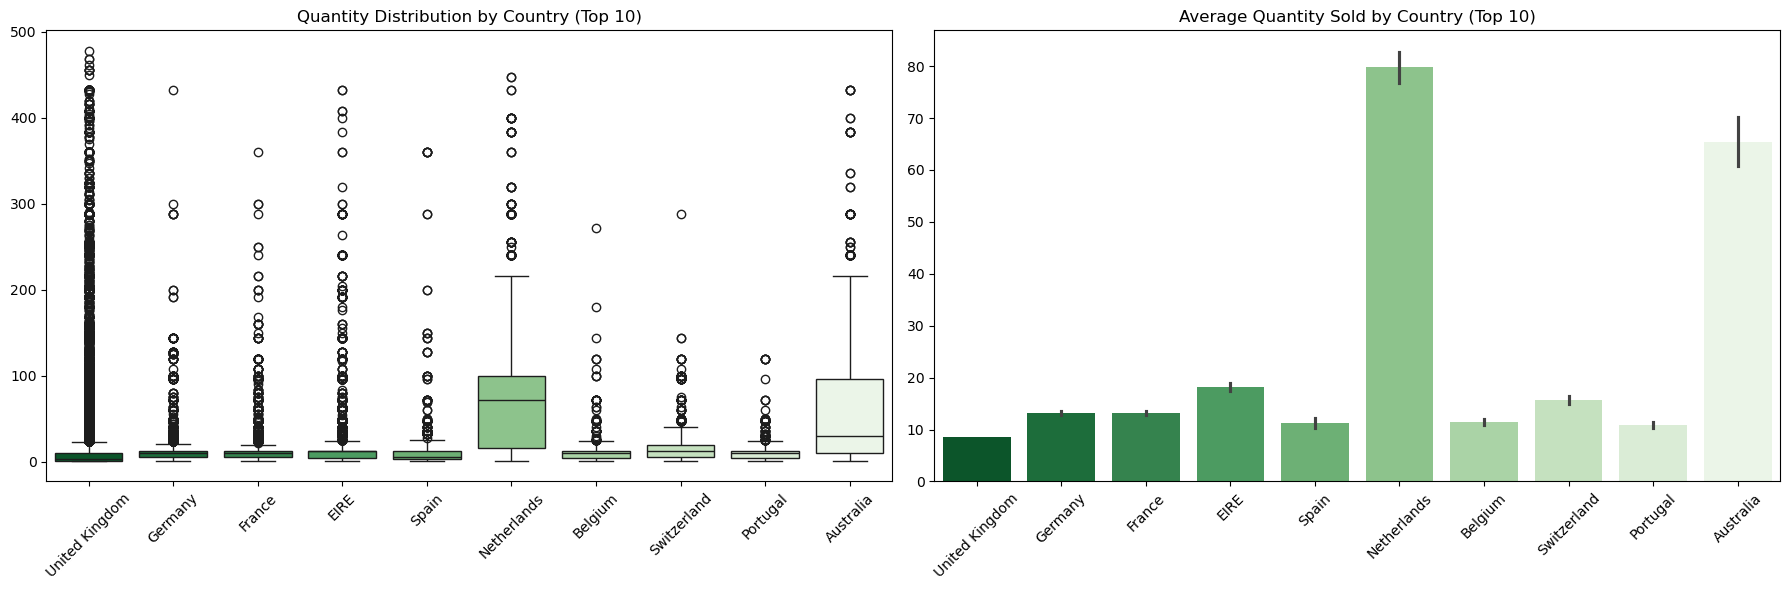

In [37]:
# Plot box and bar plots to view relationships between numerical and categorical variables --> Quantity & Country
# Count occurrences of each country and sort in descending order  
country_counts = df_zscore['Country'].value_counts().reset_index()  
country_counts.columns = ['Country', 'Count']                             # Rename columns  
country_counts = country_counts.sort_values(by='Count', ascending=False).head(10)    # Keep top 10 countries   

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(18, 6))         # 1 row, 2 columns

# Boxplot: Distribution of Quantity by Country
sns.boxplot(x='Country', y='Quantity', data=df_zscore, palette='Greens_r', 
            order=country_counts['Country'], ax=axes[0])
# Set titles and labels
axes[0].set_title(f'Quantity Distribution by Country (Top {10})')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

# Barplot: Average Quantity Sold per Country
sns.barplot(x='Country', y='Quantity', data=df_zscore, palette='Greens_r', 
            order=country_counts['Country'], estimator=np.mean, ax=axes[1])
# Set titles and labels
axes[1].set_title(f'Average Quantity Sold by Country (Top {10})')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

plt.tight_layout()               # Adjust the spacing between plots
plt.show()

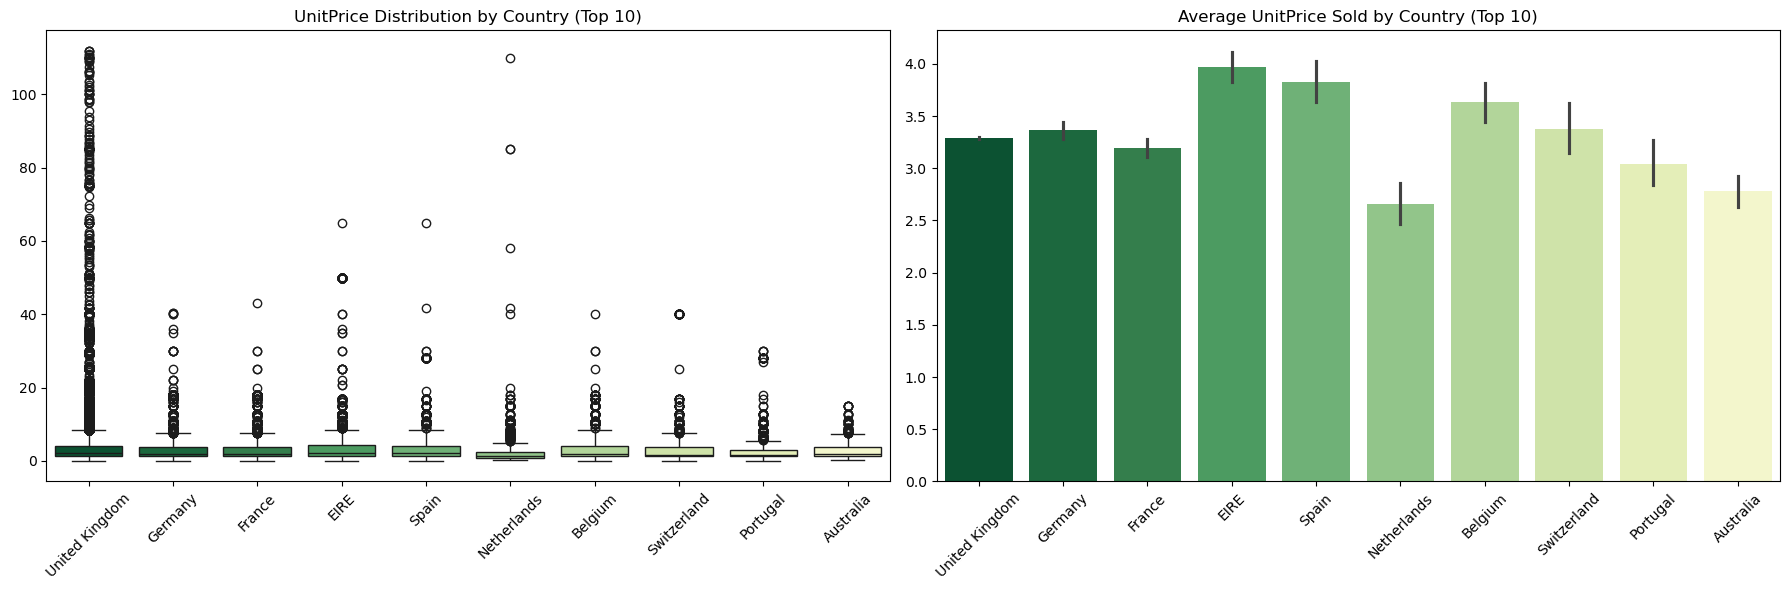

In [38]:
# Plot box and bar plots to view relationships between numerical and categorical variables --> UnitPrice & Country
# Count occurrences of each country and sort in descending order  
country_counts = df_zscore['Country'].value_counts().reset_index()  
country_counts.columns = ['Country', 'Count']                             # Rename columns  
country_counts = country_counts.sort_values(by='Count', ascending=False).head(10)    # Keep top 10 countries

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(18, 6))         # 1 row, 2 columns

# Boxplot: Distribution of UnitPrice by Country
sns.boxplot(x='Country', y='UnitPrice', data=df_zscore, palette='YlGn_r', 
            order=country_counts['Country'], ax=axes[0])
# Set titles and labels
axes[0].set_title(f'UnitPrice Distribution by Country (Top {10})')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

# Barplot: Average UnitPrice Sold per Country
sns.barplot(x='Country', y='UnitPrice', data=df_zscore, palette='YlGn_r', 
            order=country_counts['Country'], estimator=np.mean, ax=axes[1])
# Set titles and labels
axes[1].set_title(f'Average UnitPrice Sold by Country (Top {10})')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

plt.tight_layout()               # Adjust the spacing between plots
plt.show()

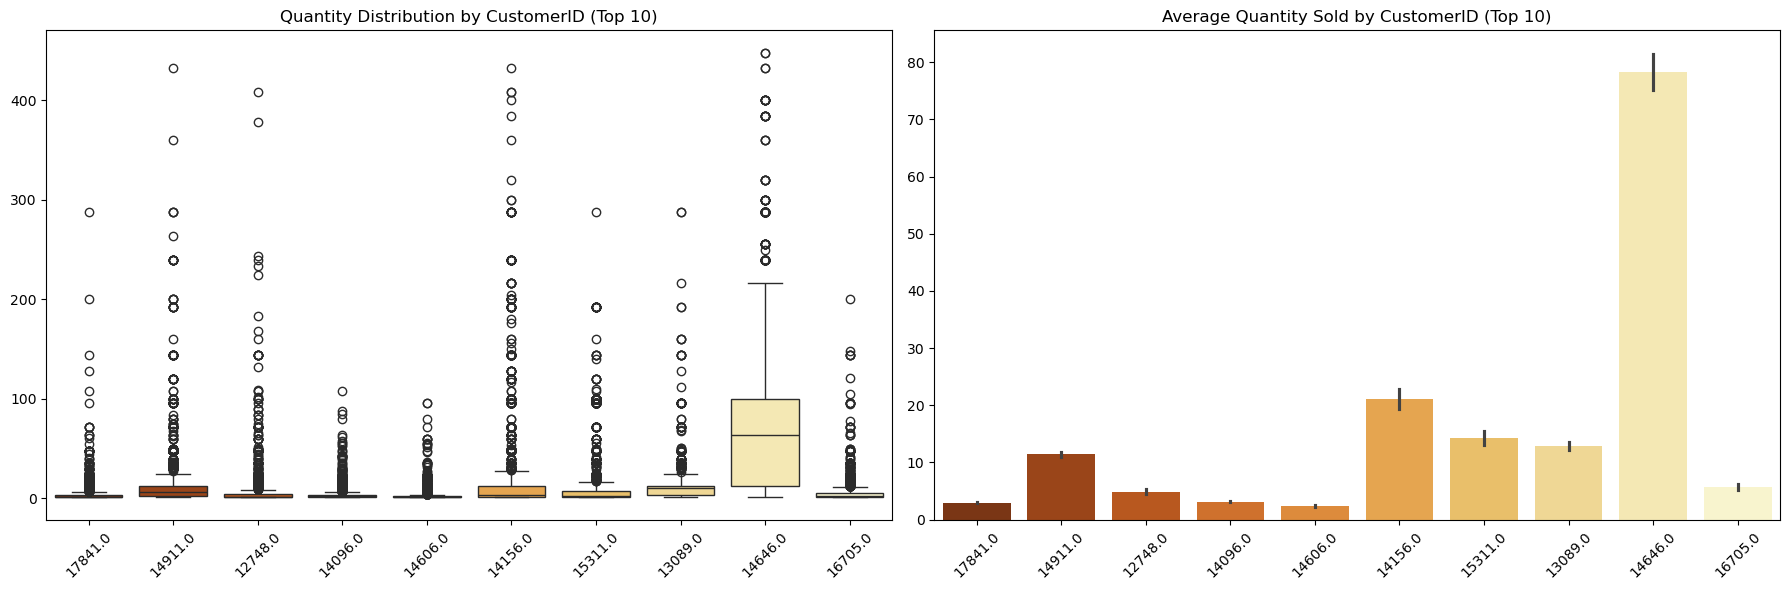

In [39]:
# Plot box and bar plots to view relationships between numerical and categorical variables --> Quantity & CustomerID
# Count occurrences of each CustomerID and sort in descending order
customer_counts = df_zscore['CustomerID'].value_counts().reset_index()
customer_counts.columns = ['CustomerID', 'Count']           # Rename columns
customer_counts = customer_counts.sort_values(by='Count', ascending=False).head(10)    # Keep top 10 customers   

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(18, 6))         # 1 row, 2 columns

# Boxplot: Distribution of Quantity by CustomerID
sns.boxplot(x='CustomerID', y='Quantity', data=df_zscore, palette='YlOrBr_r', 
            order=customer_counts['CustomerID'], ax=axes[0])
# Set titles and labels
axes[0].set_title(f'Quantity Distribution by CustomerID (Top {10})')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

# Barplot: Average Quantity Sold per CustomerID
sns.barplot(x='CustomerID', y='Quantity', data=df_zscore, palette='YlOrBr_r', 
            order=customer_counts['CustomerID'], estimator=np.mean, ax=axes[1])
# Set titles and labels
axes[1].set_title(f'Average Quantity Sold by CustomerID (Top {10})')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

plt.tight_layout()               # Adjust the spacing between plots
plt.show()

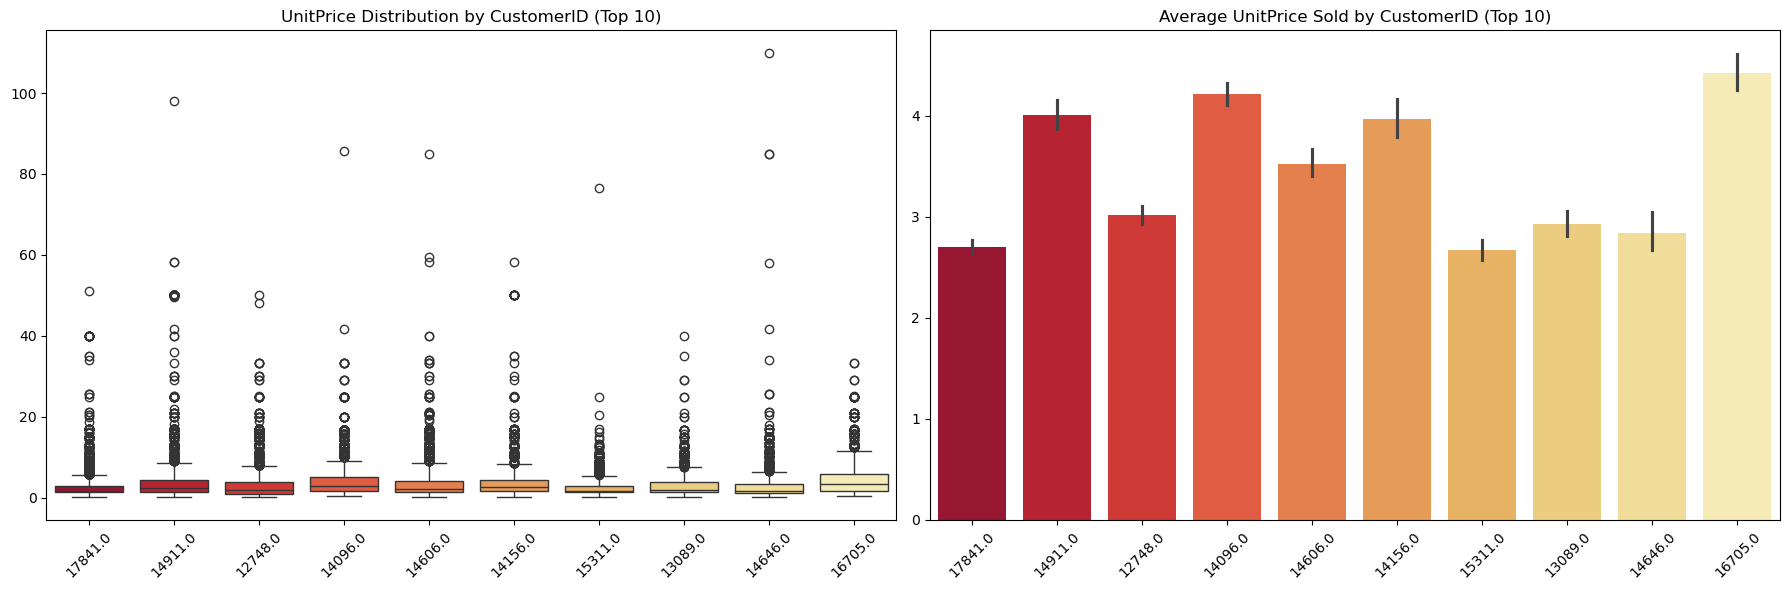

In [40]:
# Plot box and bar plots to view relationships between numerical and categorical variables --> UnitPrice & CustomerID
# Count occurrences of each CustomerID and sort in descending order
customer_counts = df_zscore['CustomerID'].value_counts().reset_index()
customer_counts.columns = ['CustomerID', 'Count']           # Rename columns
customer_counts = customer_counts.sort_values(by='Count', ascending=False).head(10)    # Keep top 10 customers   

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(18, 6))         # 1 row, 2 columns

# Boxplot: Distribution of UnitPrice by CustomerID
sns.boxplot(x='CustomerID', y='UnitPrice', data=df_zscore, palette='YlOrRd_r', 
            order=customer_counts['CustomerID'], ax=axes[0])
# Set titles and labels
axes[0].set_title(f'UnitPrice Distribution by CustomerID (Top {10})')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

# Barplot: Average UnitPrice Sold per CustomerID
sns.barplot(x='CustomerID', y='UnitPrice', data=df_zscore, palette='YlOrRd_r', 
            order=customer_counts['CustomerID'], estimator=np.mean, ax=axes[1])
# Set titles and labels
axes[1].set_title(f'Average UnitPrice Sold by CustomerID (Top {10})')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

plt.tight_layout()               # Adjust the spacing between plots
plt.show()

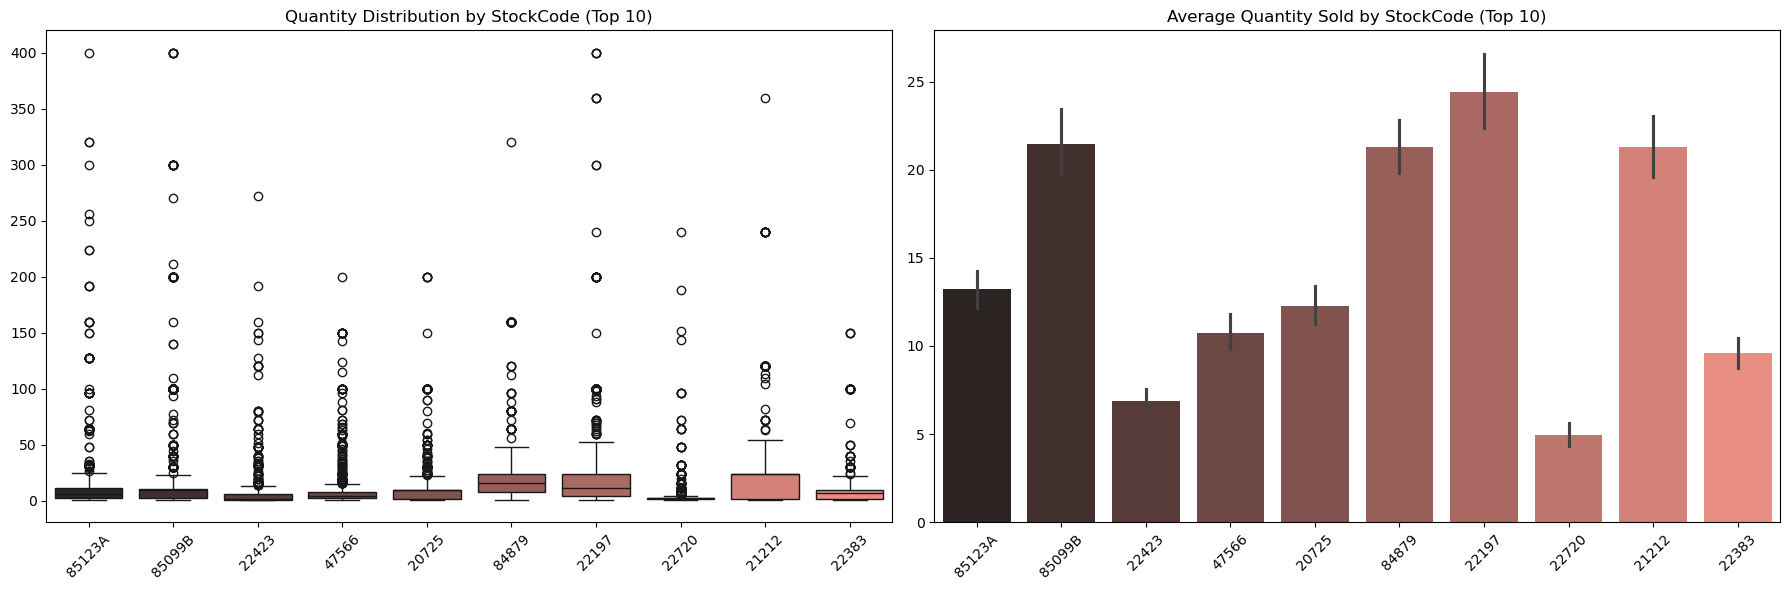

In [41]:
# Plot box and bar plots to view relationships between numerical and categorical variables --> Quantity & StockCode
# Count occurrences of each StockCode and sort in descending order
stock_counts = df_zscore['StockCode'].value_counts().reset_index()
stock_counts.columns = ['StockCode', 'Count']         # Rename columns
stock_counts = stock_counts.sort_values(by='Count', ascending=False).head(10)    # Keep top 10 best-selling products

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(18, 6))         # 1 row, 2 columns

# Boxplot: Distribution of Quantity by StockCode
sns.boxplot(x='StockCode', y='Quantity', data=df_zscore, palette='dark:salmon', 
            order=stock_counts['StockCode'], ax=axes[0])
# Set titles and labels
axes[0].set_title(f'Quantity Distribution by StockCode (Top {10})')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

# Barplot: Average Quantity Sold per StockCode
sns.barplot(x='StockCode', y='Quantity', data=df_zscore, palette='dark:salmon', 
            order=stock_counts['StockCode'], estimator=np.mean, ax=axes[1])
# Set titles and labels
axes[1].set_title(f'Average Quantity Sold by StockCode (Top {10})')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

plt.tight_layout()               # Adjust the spacing between plots
plt.show()

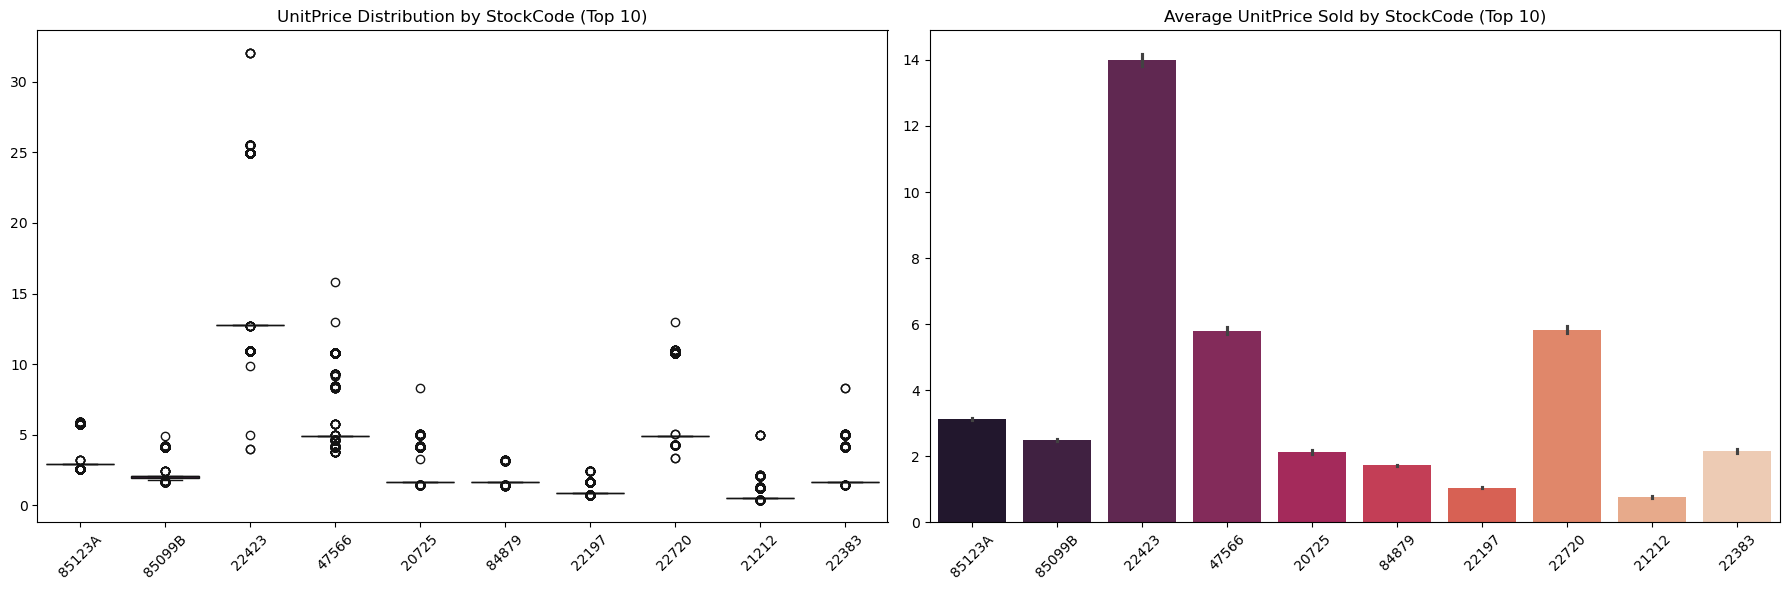

In [42]:
# Plot box and bar plots to view relationships between numerical and categorical variables --> UnitPrice & StockCode
# Count occurrences of each StockCode and sort in descending order
stock_counts = df_zscore['StockCode'].value_counts().reset_index()
stock_counts.columns = ['StockCode', 'Count']         # Rename columns
stock_counts = stock_counts.sort_values(by='Count', ascending=False).head(10)    # Keep top 10 best-selling products

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(18, 6))         # 1 row, 2 columns

# Boxplot: Distribution of UnitPrice by StockCode
sns.boxplot(x='StockCode', y='UnitPrice', data=df_zscore, palette='rocket', 
            order=stock_counts['StockCode'], ax=axes[0])
# Set titles and labels
axes[0].set_title(f'UnitPrice Distribution by StockCode (Top {10})')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

# Barplot: Average UnitPrice Sold per StockCode
sns.barplot(x='StockCode', y='UnitPrice', data=df_zscore, palette='rocket', 
            order=stock_counts['StockCode'], estimator=np.mean, ax=axes[1])
# Set titles and labels
axes[1].set_title(f'Average UnitPrice Sold by StockCode (Top {10})')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

plt.tight_layout()               # Adjust the spacing between plots
plt.show()

### Categorical Features

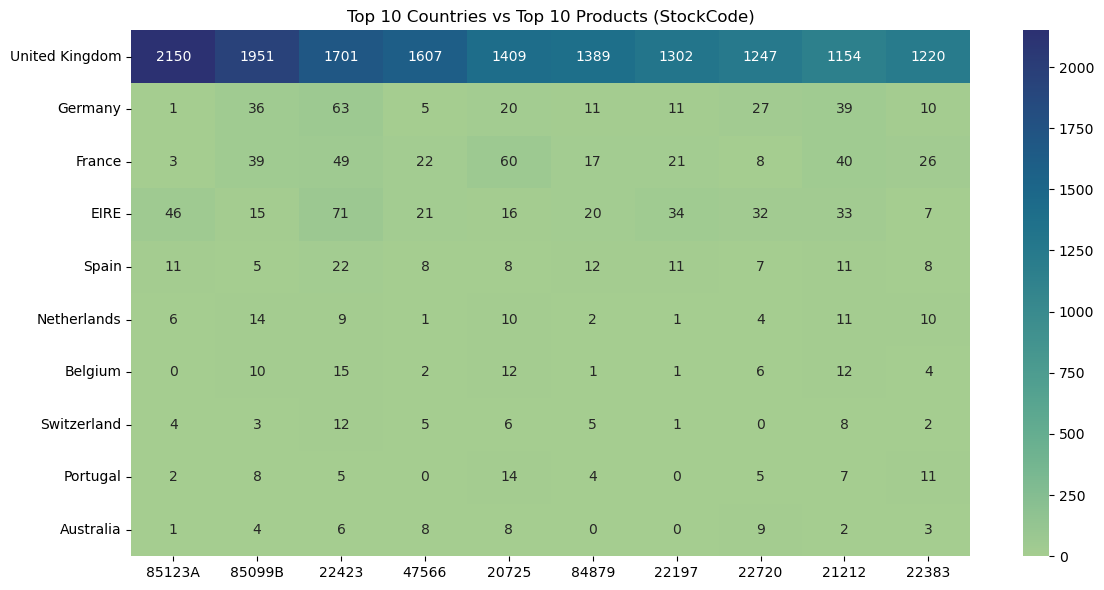

In [43]:
# Plot a heatmap to view relationships between variables --> Country & StockCode
# Create a cross-tabulation between Country and StockCode
country_stock = pd.crosstab(df_zscore['Country'], df_zscore['StockCode'])

# Filter top 10 countries and top 10 stock codes for better readability
top_countries = df_zscore['Country'].value_counts().head(10).index
top_stocks = df_zscore['StockCode'].value_counts().head(10).index
filtered_data = country_stock.loc[top_countries, top_stocks]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_data, annot=True, fmt='d', cmap='crest')

# Set titles and labels
plt.title('Top 10 Countries vs Top 10 Products (StockCode)')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

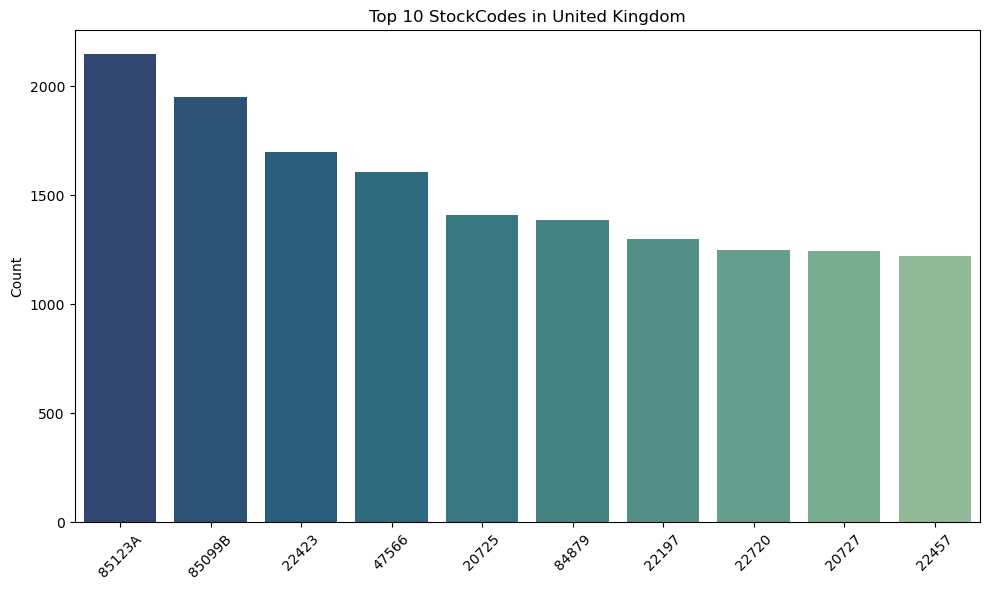

In [44]:
# Plot a bar chart to view relationships between variables --> Country & StockCode
# Select a country (e.g. UK)
selected_country = 'United Kingdom'

# Filter for that country
df_country = df_zscore[df_zscore['Country'] == selected_country]

# Group by StockCode and Count
stockcode_counts = df_country['StockCode'].value_counts().head(10).reset_index()           # Keep top 10
stockcode_counts.columns = ['StockCode', 'Count']

# Plot barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=stockcode_counts, x='StockCode', y='Count', palette='crest_r',
            order=stockcode_counts['StockCode'])

# Set titles and labels
plt.title(f'Top 10 StockCodes in {selected_country}')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

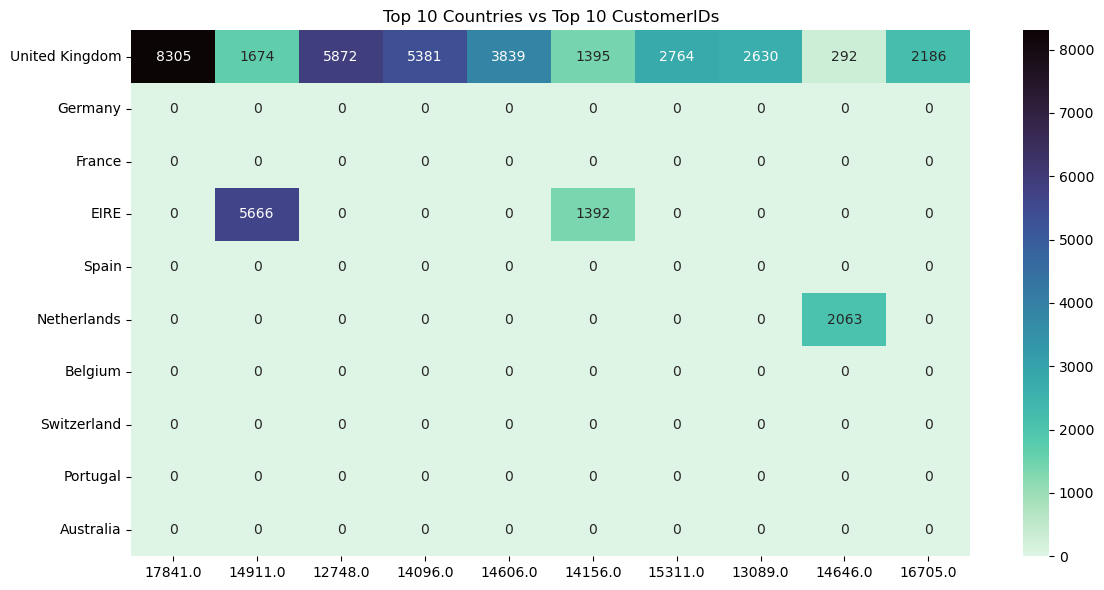

In [45]:
# Plot a heatmap to view relationships between variables --> Country & CustomerID
# Create a cross-tabulation between Country and CustomerID
country_customer = pd.crosstab(df_zscore['Country'], df_zscore['CustomerID'])

# Filter top 10 countries and top 10 customerIDs for better readability
top_countries = df_zscore['Country'].value_counts().head(10).index
top_CustomerIDs = df_zscore['CustomerID'].value_counts().head(10).index
filtered_data = country_customer.loc[top_countries, top_CustomerIDs]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_data, annot=True, fmt='d', cmap='mako_r')

# Set titles and labels
plt.title('Top 10 Countries vs Top 10 CustomerIDs')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

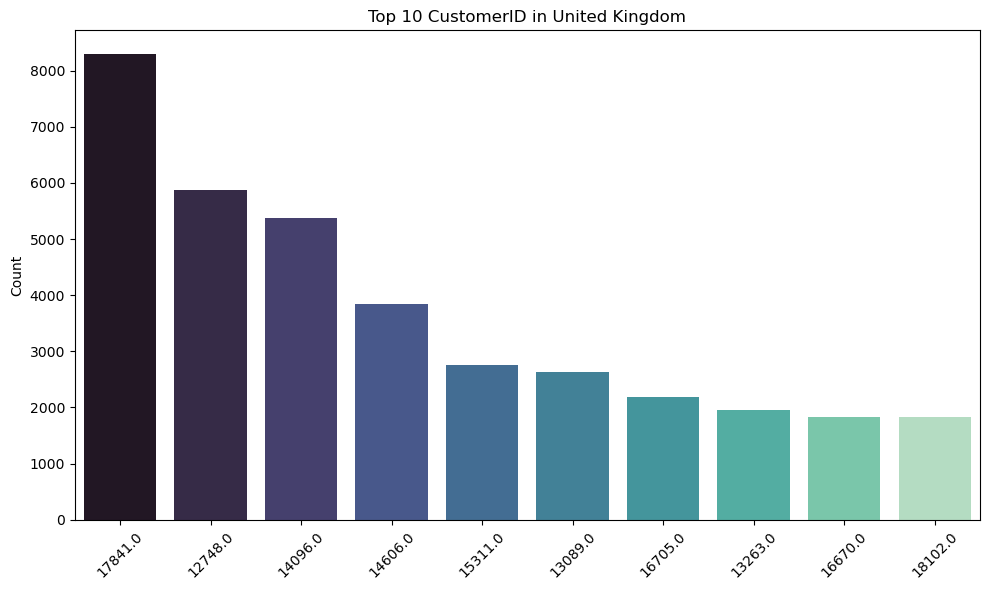

In [46]:
# Plot a bar chart to view relationships between variables --> Country & CustomerID
# Select a country (e.g. UK)
selected_country = 'United Kingdom'

# Filter for that country
df_country = df_zscore[df_zscore['Country'] == selected_country]

# Group by CustomerID and Count
customerID_counts = df_country['CustomerID'].value_counts().head(10).reset_index()           # Keep top 10
customerID_counts.columns = ['CustomerID', 'Count']

# Plot barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=customerID_counts, x='CustomerID', y='Count', palette='mako',
            order=customerID_counts['CustomerID'])

# Set titles and labels
plt.title(f'Top 10 CustomerID in {selected_country}')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

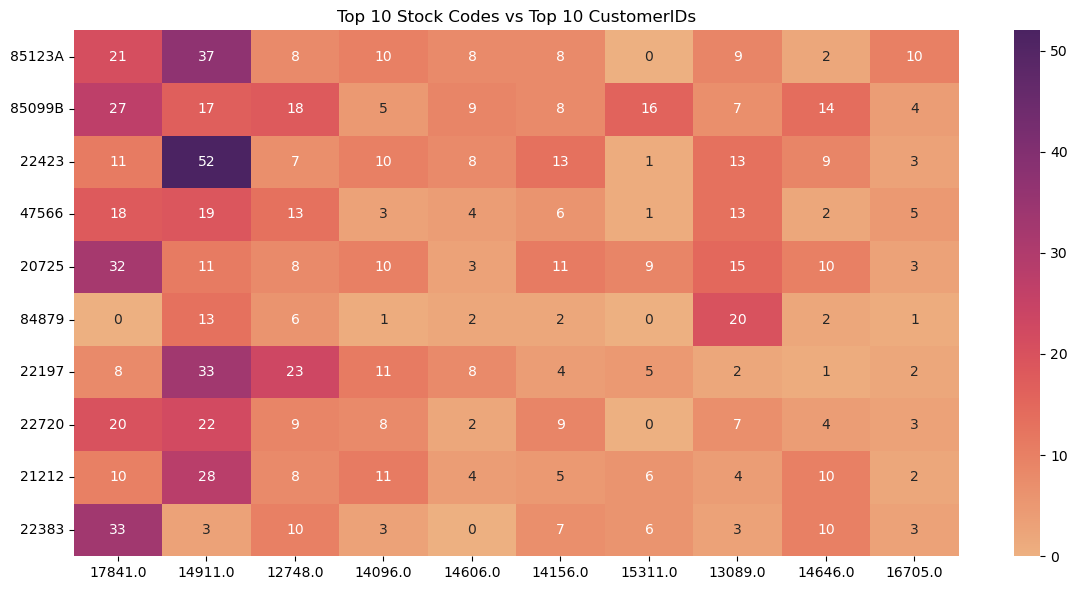

In [47]:
# Plot a heatmap to view relationships between variables --> StockCode & CustomerID
# Create a cross-tabulation between StockCode and CustomerID
stock_customer = pd.crosstab(df_zscore['StockCode'], df_zscore['CustomerID'])

# Filter top 10 stock codes and top 10 customerIDs for better readability
top_stocks = df_zscore['StockCode'].value_counts().head(10).index
top_CustomerIDs = df_zscore['CustomerID'].value_counts().head(10).index
filtered_data = stock_customer.loc[top_stocks, top_CustomerIDs]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_data, annot=True, fmt='d', cmap='flare')

# Set titles and labels
plt.title('Top 10 Stock Codes vs Top 10 CustomerIDs')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

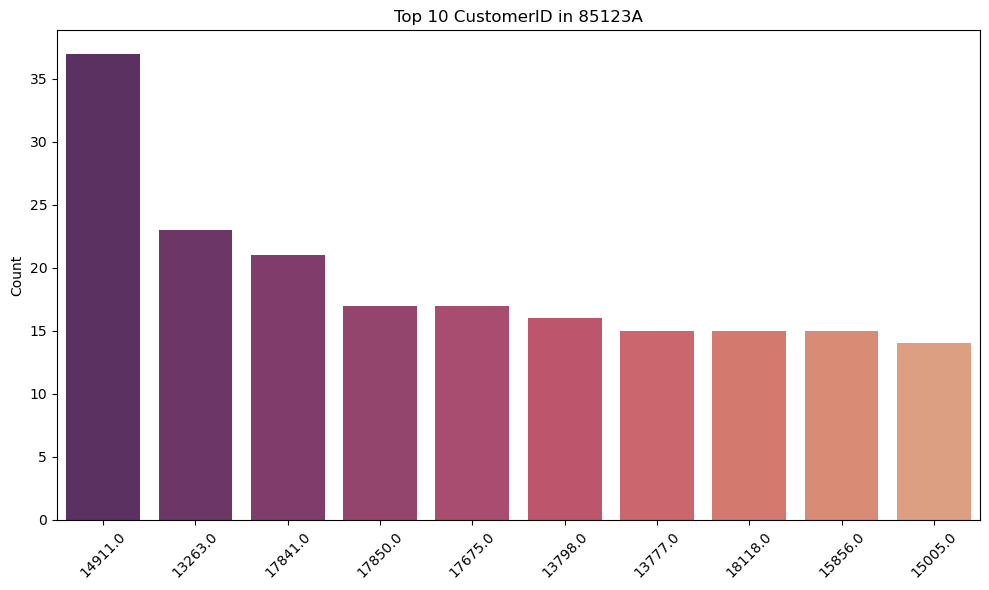

In [48]:
# Plot a bar chart to view relationships between variables --> StockCode & CustomerID
# Select a StockCode (e.g. 85123A)
selected_stockcode = '85123A'

# Filter for that stockcode
df_stockcode = df_zscore[df_zscore['StockCode'] == selected_stockcode]

# Group by CustomerID and Count
customerID_counts = df_stockcode['CustomerID'].value_counts().head(10).reset_index()           # Keep top 10
customerID_counts.columns = ['CustomerID', 'Count']

# Plot barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=customerID_counts, x='CustomerID', y='Count', palette='flare_r',
            order=customerID_counts['CustomerID'])

# Set titles and labels
plt.title(f'Top 10 CustomerID in {selected_stockcode}')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div id="analyze_trends"> 
    <h2>Analyze Trends</h2>    
</div>

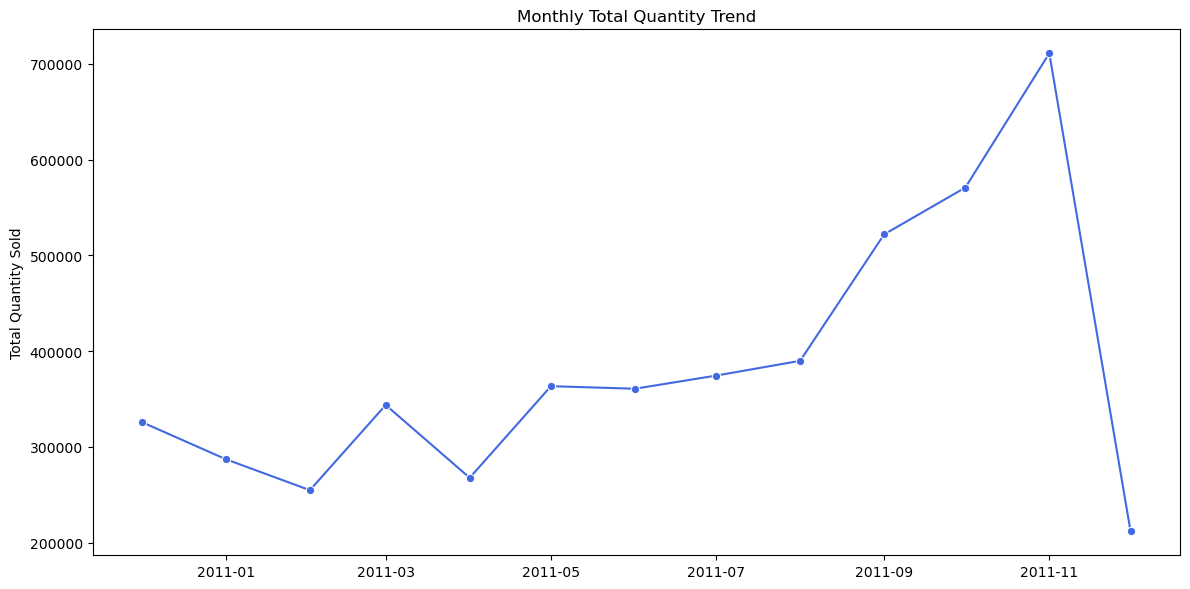

In [49]:
# Plot a time series plot to analyze trends over time --> Monthly 'Quantity' trend 
# Create a 'InvoiceMonth' column for monthly trend
df_zscore['InvoiceMonth'] = df_zscore['InvoiceDate'].dt.to_period('M').dt.to_timestamp()

# Group by month and calculate total quantity sold
monthly_trend = df_zscore.groupby('InvoiceMonth')['Quantity'].sum().reset_index()

# Plot the monthly trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='InvoiceMonth', y='Quantity', marker='o', color='royalblue')

# Set titles and labels
plt.title('Monthly Total Quantity Trend')
plt.xlabel('')
plt.ylabel('Total Quantity Sold')
plt.tight_layout()
plt.show()

#### 🧮 Total Price Calculation <a id="total_price"></a>

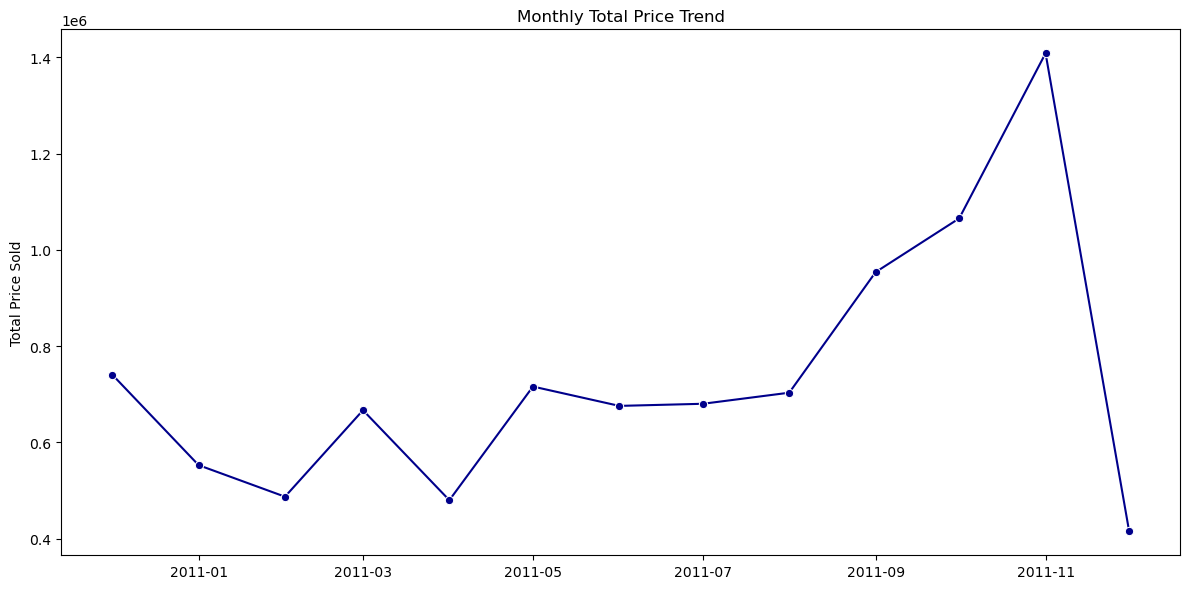

In [50]:
# Plot a time series plot to analyze trends over time --> Monthly 'TotalPrice' trend 
# Create 'TotalPrice' feature 
df_zscore['TotalPrice'] = df_zscore['Quantity'] * df_zscore['UnitPrice']

# Group by month and calculate total price sold
monthly_trend = df_zscore.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index()

# Plot the monthly trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='InvoiceMonth', y='TotalPrice', marker='o', color='darkblue')

# Set titles and labels
plt.title('Monthly Total Price Trend')
plt.xlabel('')
plt.ylabel('Total Price Sold')
plt.tight_layout()
plt.show()

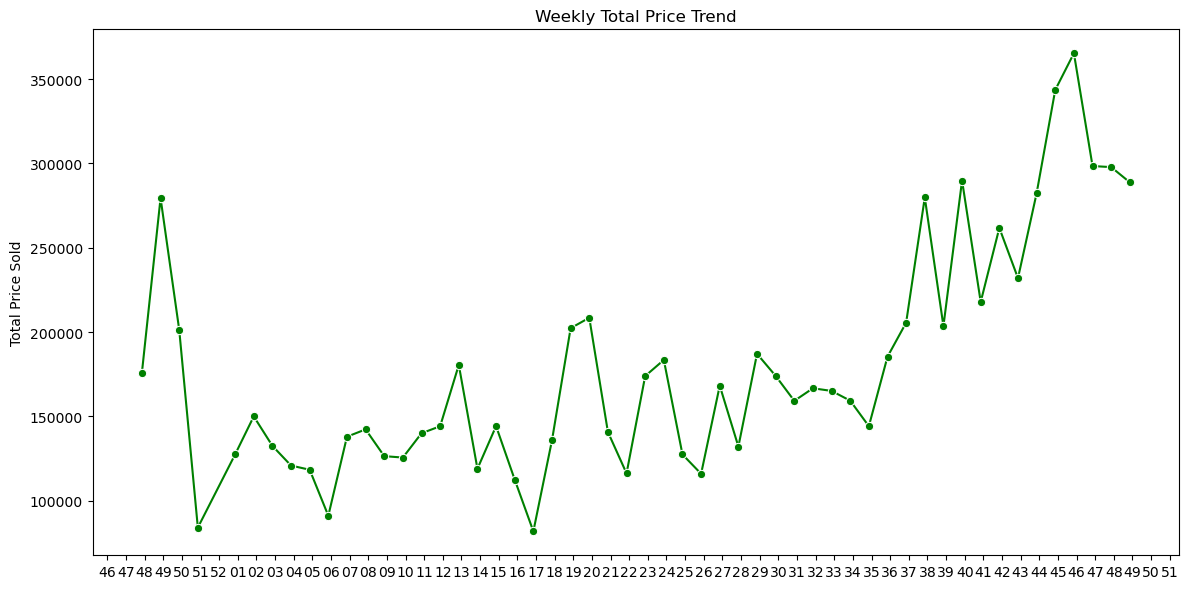

In [51]:
# Plot a time series plot to analyze trends over time --> Weekly 'TotalPrice' trend
# Create a 'InvoiceWeek' column for weekly trend
df_zscore['InvoiceWeek'] = df_zscore['InvoiceDate'].dt.to_period('W').dt.to_timestamp()

# Group by week and calculate total price sold
weekly_trend = weekly_trend = df_zscore.groupby('InvoiceWeek')['TotalPrice'].sum().reset_index()

# Plot the weekly trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_trend, x='InvoiceWeek', y='TotalPrice', marker='o', color='green')

# Set the date format for x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%W'))        # Format: Year-Week
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))   # Adjust the interval for weekly ticks

# Set titles and labels
plt.title('Weekly Total Price Trend')
plt.xlabel('')
plt.ylabel('Total Price Sold')
plt.tight_layout()
plt.show()

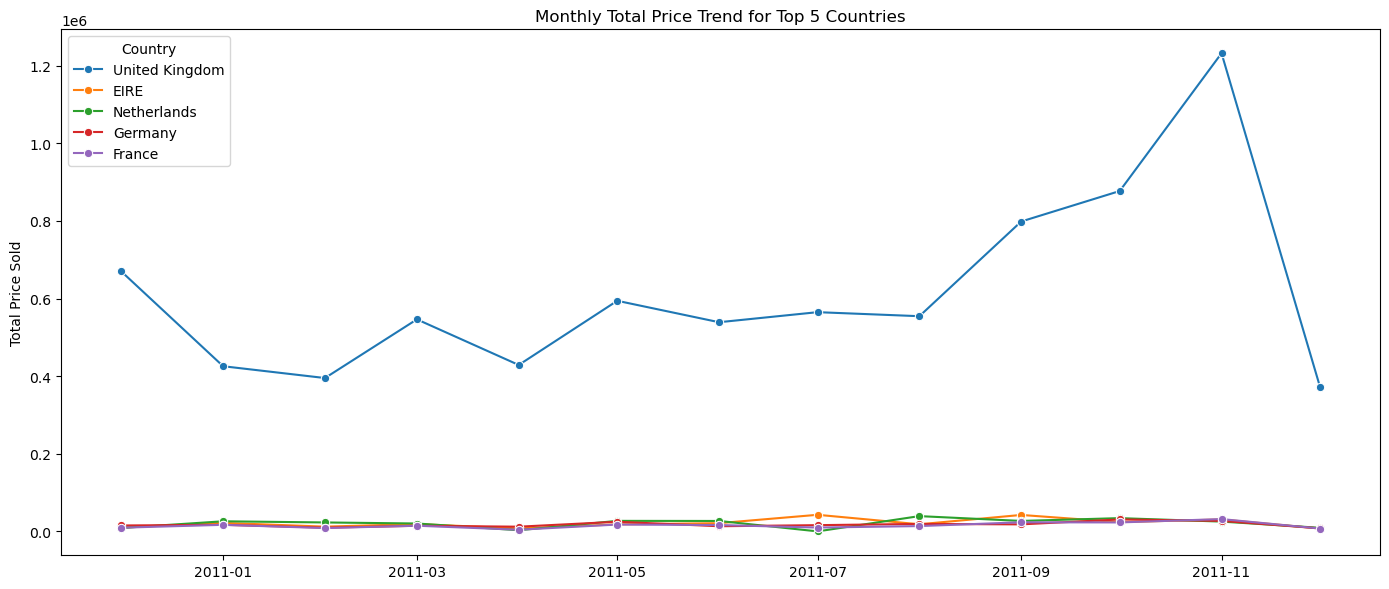

In [52]:
# Plot a time series plot to analyze trends over time --> Monthly 'TotalPrice' trend based on 'Country'
# Get top 5 countries by total price
top_countries = df_zscore.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5).index.tolist()     # Top 5 countries

# Filter data for only top countries
df_top_countries = df_zscore[df_zscore['Country'].isin(top_countries)].copy()

# Group by month and country, then sum total price
monthly_country_trend = df_top_countries.groupby(['InvoiceMonth', 'Country'])['TotalPrice'].sum().reset_index()

# Plot the monthly trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_country_trend, x='InvoiceMonth', y='TotalPrice', hue='Country', marker='o',
             hue_order=top_countries)       

# Set titles and labels
plt.title('Monthly Total Price Trend for Top 5 Countries')
plt.xlabel('')
plt.ylabel('Total Price Sold')
plt.tight_layout()
plt.show()

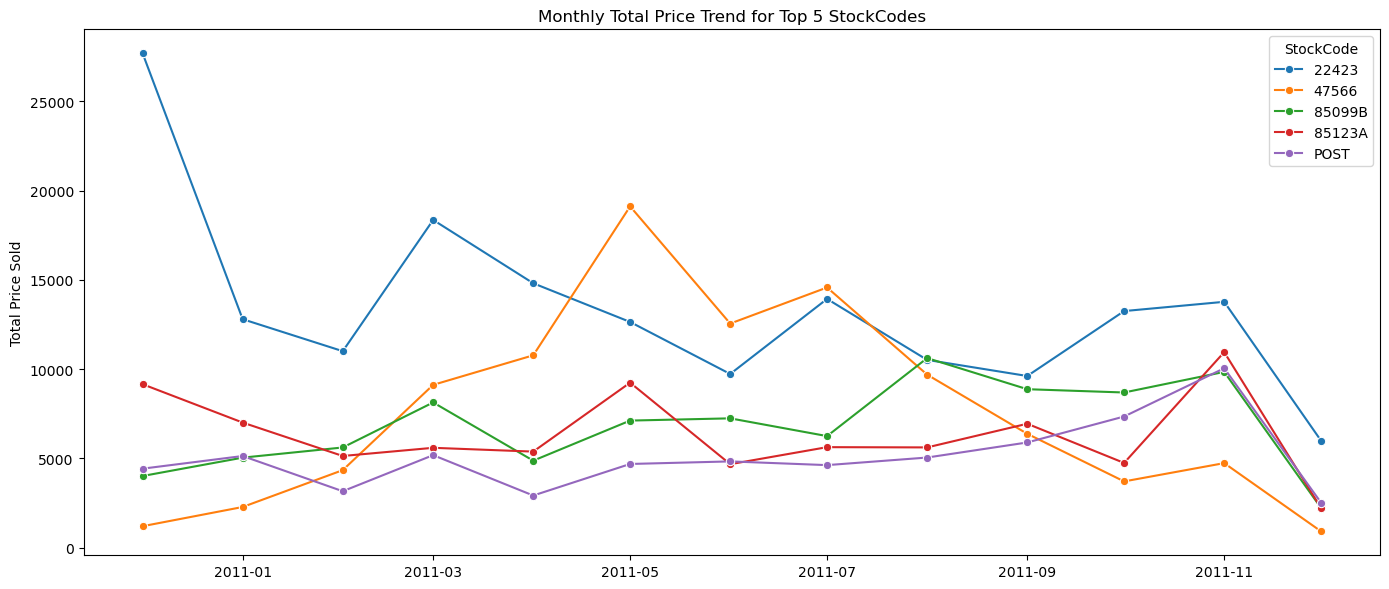

In [53]:
# Plot a time series plot to analyze trends over time --> Monthly 'TotalPrice' trend based on 'StockCode'
# Get top 5 most sold products by total price
top_stockcodes = df_zscore.groupby('StockCode')['TotalPrice'].sum().sort_values(ascending=False).head(5).index.tolist()     # Top 5 stockcodes

# Filter data for only top products (stockcodes)
df_top_stockcodes = df_zscore[df_zscore['StockCode'].isin(top_stockcodes)].copy()

# Group by month and stockcode, then sum total price
monthly_stockcode_trend = df_top_stockcodes.groupby(['InvoiceMonth', 'StockCode'])['TotalPrice'].sum().reset_index()

# Plot the monthly trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_stockcode_trend, x='InvoiceMonth', y='TotalPrice', hue='StockCode', marker='o',
             hue_order=top_stockcodes)

# Set titles and labels
plt.title('Monthly Total Price Trend for Top 5 StockCodes')
plt.xlabel('')
plt.ylabel('Total Price Sold')
plt.tight_layout()
plt.show()

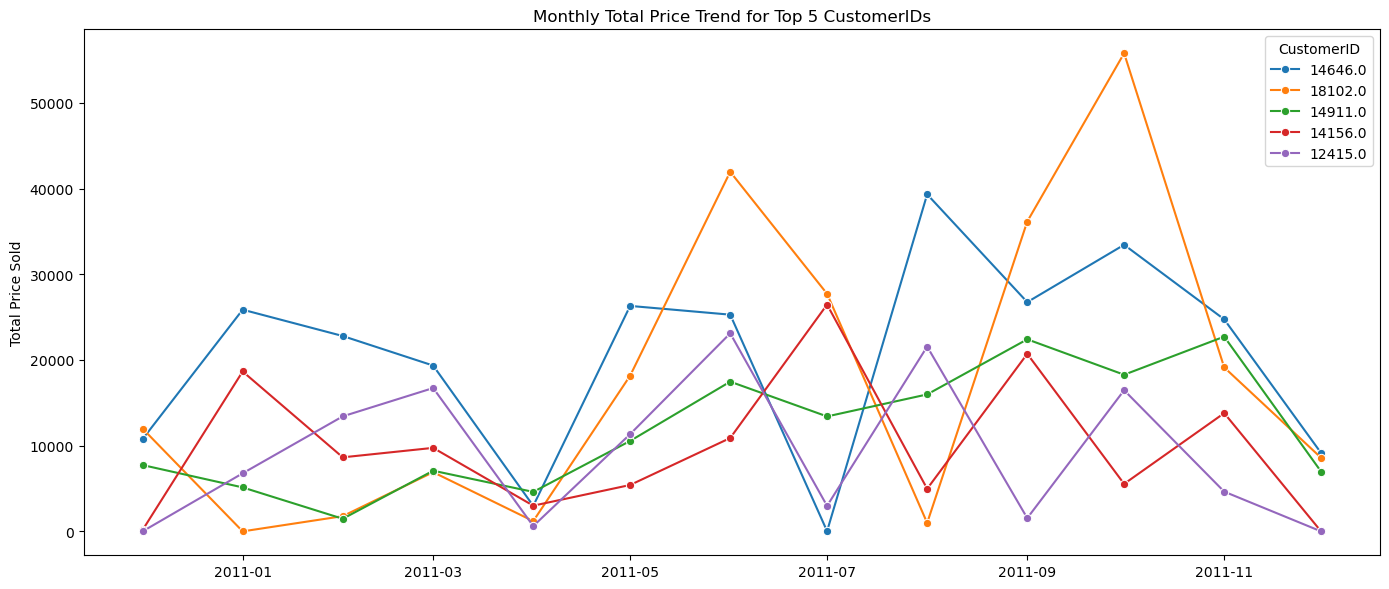

In [54]:
# Plot a time series plot to analyze trends over time --> Monthly 'TotalPrice' trend based on 'CustomerID'
# Get top 5 customerIDs by total price
top_customerIDs = df_zscore.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(5).index.tolist()     # Top 5 customerIDs

# Filter data for only top customerIDs
df_top_customerIDs = df_zscore[df_zscore['CustomerID'].isin(top_customerIDs)].copy()

# Group by month and customerID, then sum total price
monthly_customerIDs_trend = df_top_customerIDs.groupby(['InvoiceMonth', 'CustomerID'])['TotalPrice'].sum().reset_index()

# Plot the monthly trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_customerIDs_trend, x='InvoiceMonth', y='TotalPrice', hue='CustomerID', marker='o',
             hue_order=top_customerIDs)

# Set titles and labels
plt.title('Monthly Total Price Trend for Top 5 CustomerIDs')
plt.xlabel('')
plt.ylabel('Total Price Sold')
plt.tight_layout()
plt.show()

<div id="cohort_analysis"> 
    <h2>Cohort Analysis</h2>    
</div>
In this analysis, customers are grouped based on when they first purchased (e.g., the month they first purchased), then it is examined how active they remain and return to purchase in subsequent months.

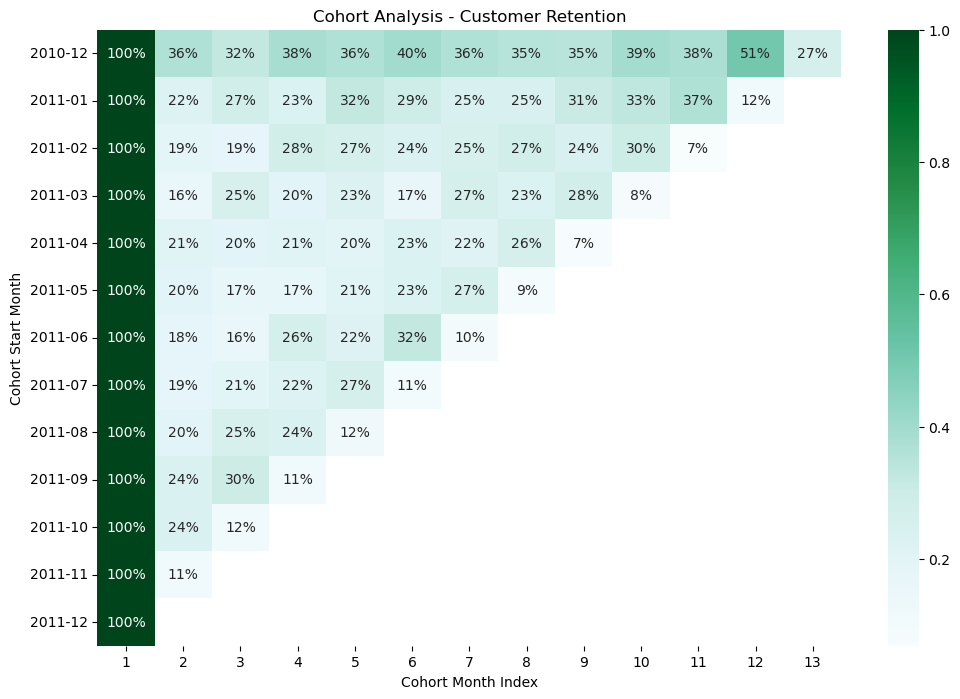

In [55]:
# Cohort analysis to identify customer behaviors at different times 
# Create the 'CohortMonth': the month of the customer's first purchase
df_zscore['CohortMonth'] = df_zscore.groupby('CustomerID')['InvoiceMonth'].transform('min')

# Calculate the number of months between the invoice date and the cohort month
def get_month_diff(df):
    return (df_zscore['InvoiceMonth'].dt.year - df_zscore['CohortMonth'].dt.year) * 12 + \
           (df_zscore['InvoiceMonth'].dt.month - df_zscore['CohortMonth'].dt.month)

df_zscore['CohortIndex'] = get_month_diff(df_zscore) + 1      # Month index starts at 1

# Count unique customers in each CohortMonth and CohortIndex
cohort_data = df_zscore.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

# Pivot the data to create a retention matrix
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Get cohort sizes (number of customers in the first month)
cohort_sizes = cohort_counts.iloc[:, 0]

# Calculate retention rates
retention = cohort_counts.divide(cohort_sizes, axis=0).round(3)

# Format CohortMonth to show only YYYY-MM
retention.index = retention.index.to_series().dt.strftime('%Y-%m')

# Plot the retention matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='BuGn', cbar=True)

# Set titles and labels
plt.title('Cohort Analysis - Customer Retention')
plt.xlabel('Cohort Month Index')
plt.ylabel('Cohort Start Month')
plt.show()

<div id="time_based_heatmap"> 
    <h2>Time-based Heatmap</h2>    
</div>

#### 🧮 Hour & DayOfWeek Extraction <a id="hourdayofweek_extraction"></a>

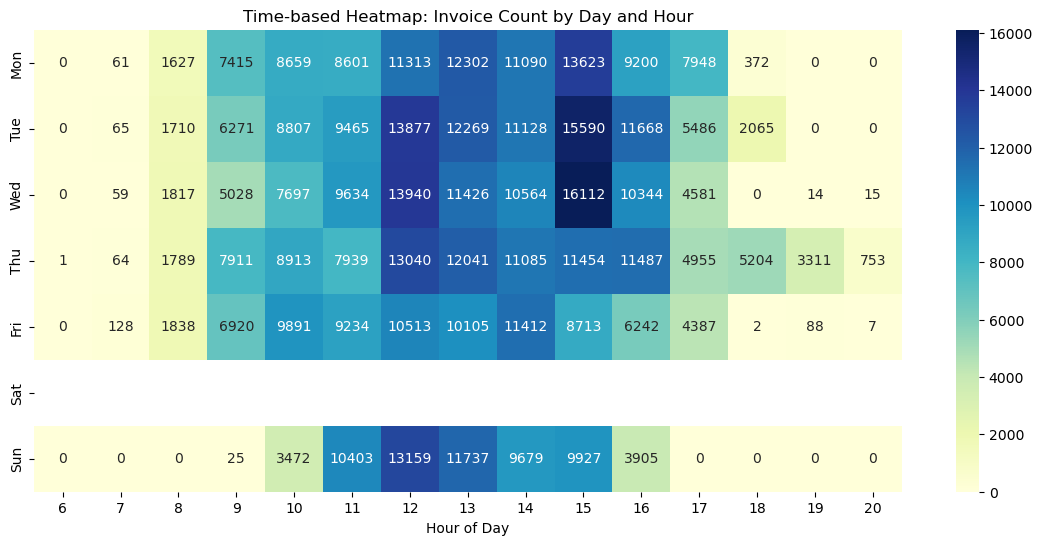

In [56]:
# Plot a heatmap to show what times of the week customers had the most interaction
# Extract Hour and Day of Week
df_zscore['Hour'] = df_zscore['InvoiceDate'].dt.hour
df_zscore['DayOfWeek'] = df_zscore['InvoiceDate'].dt.dayofweek  # Monday=0, Sunday=6

# Map day numbers to names
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_zscore['DayOfWeek'] = df_zscore['DayOfWeek'].apply(lambda x: day_labels[x])

# Create pivot table: count of invoices per DayOfWeek and Hour
time_heatmap = df_zscore.pivot_table(index='DayOfWeek', columns='Hour', 
                                     values='InvoiceNo', aggfunc='count').fillna(0)

# Reorder days for visual clarity
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
time_heatmap = time_heatmap.reindex(day_order)

# Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(time_heatmap, cmap='YlGnBu', annot=True, fmt='.0f')

# Set titles and labels
plt.title('Time-based Heatmap: Invoice Count by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('')
plt.show()

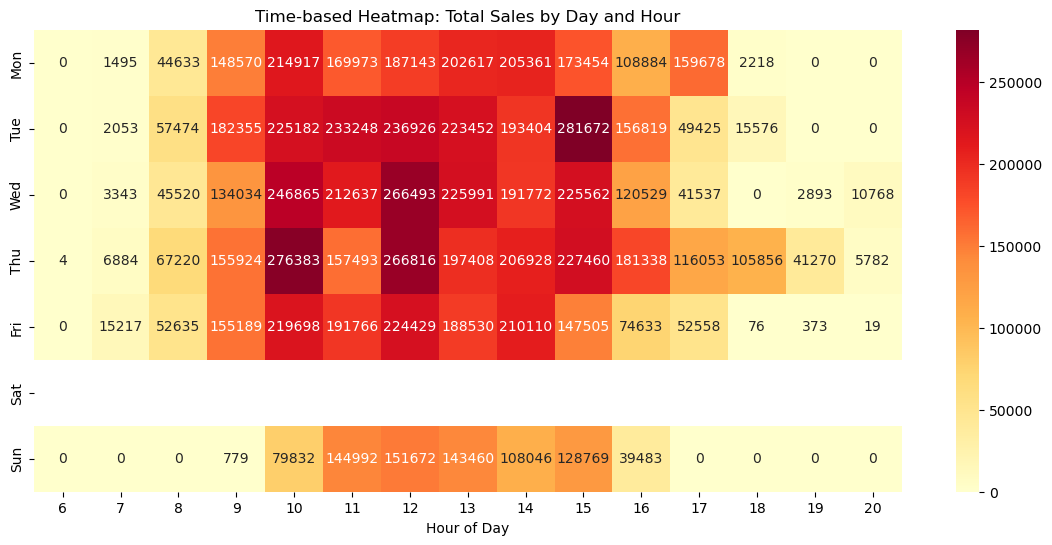

In [57]:
# Plot a heatmap to show what times of the week the highest amount of sales occurred
# Create pivot table: total sales per DayOfWeek and Hour
sales_heatmap = df_zscore.pivot_table(index='DayOfWeek', columns='Hour',
                                      values='TotalPrice', aggfunc='sum').fillna(0)

# Reorder days for visual clarity
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sales_heatmap = sales_heatmap.reindex(day_order)

# Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(sales_heatmap, cmap='YlOrRd', annot=True, fmt='.0f')

# Set titles and labels
plt.title('Time-based Heatmap: Total Sales by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('')
plt.show()

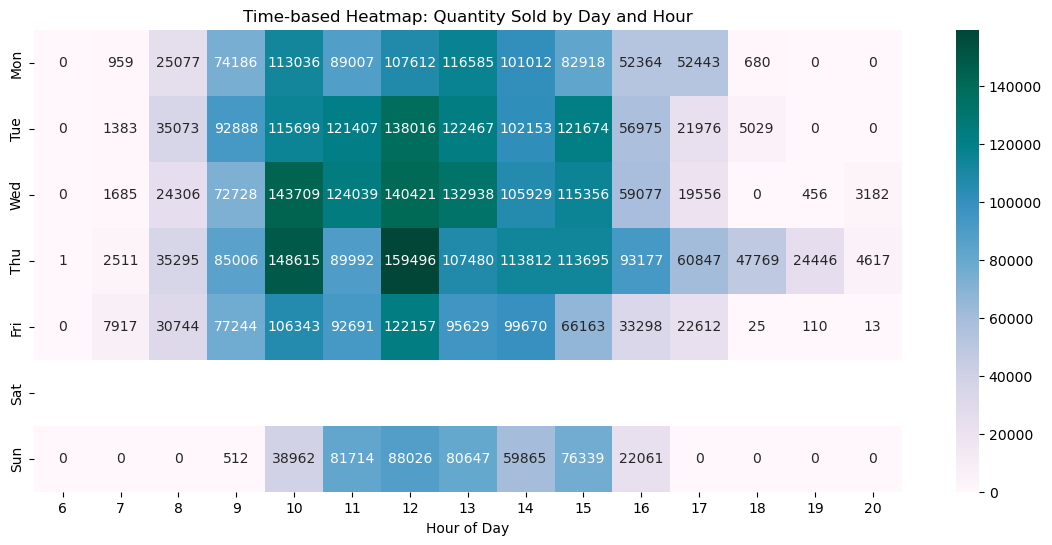

In [58]:
# Plot a heatmap to show what times of the week the number of products sold
#Create pivot table: total quantity sold per DayOfWeek and Hour
quantity_heatmap = df_zscore.pivot_table(index='DayOfWeek', columns='Hour',
                                         values='Quantity', aggfunc='sum').fillna(0)

# Reorder days for visual clarity
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
quantity_heatmap = quantity_heatmap.reindex(day_order)

# Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(quantity_heatmap, cmap='PuBuGn', annot=True, fmt='.0f')

# Set titles and labels
plt.title('Time-based Heatmap: Quantity Sold by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('')
plt.show()

<div id="seasonal_holiday_trends_analysis"> 
    <h2>Seasonal & Holiday Trends Analysis</h2>    
</div>

#### 🧮 Season Extraction <a id="season_extraction"></a>

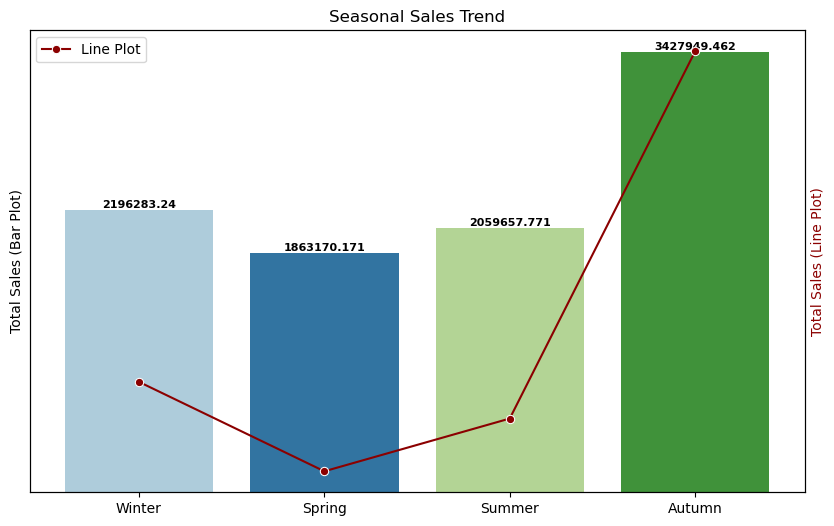

In [59]:
# Plot bar & line plots to find seasonal sales trend
# Extract season (1=Winter, 2=Spring, etc.)
df_zscore['Season'] = df_zscore['InvoiceDate'].dt.month % 12 // 3 + 1

# Map numeric seasons to names
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}
df_zscore['Season'] = df_zscore['Season'].map(season_map)

# Calculate total sales for each season
season_sales = df_zscore.groupby('Season')['TotalPrice'].sum().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])

# Plot combined barplot and lineplot
plt.figure(figsize=(10, 6))

# Plot the barplot
ax = sns.barplot(x=season_sales.index, y=season_sales.values, palette='Paired', label='Bar Plot')

# Plot the lineplot
ax2 = ax.twinx()
sns.lineplot(x=season_sales.index, y=season_sales.values, color='darkred', marker='o', ax=ax2, label='Line Plot')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black', fontweight='bold')

# Set title and labels
ax.set_title('Seasonal Sales Trend')
ax.set_ylabel('Total Sales (Bar Plot)')
ax2.set_ylabel('Total Sales (Line Plot)', color='darkred')
ax.set_xlabel('')
ax.set_yticks([])
ax2.set_yticks([])
plt.show()

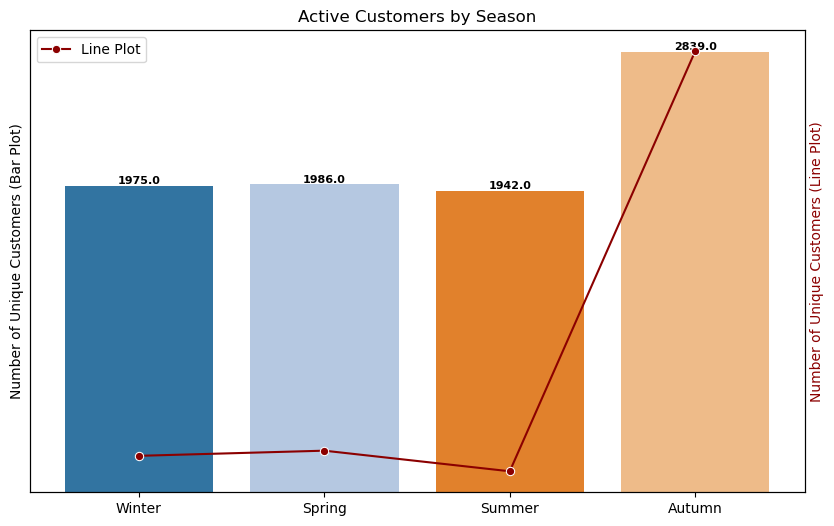

In [60]:
# Plot bar & line plots to find seasonal customer activity
# Count unique customers per season
active_customers = df_zscore.groupby('Season')['CustomerID'].nunique().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])

# Plot combined barplot and lineplot
plt.figure(figsize=(10, 6))

# Plot the barplot
ax = sns.barplot(x=active_customers.index, y=active_customers.values, palette='tab20', label='Bar Plot')

# Plot the lineplot
ax2 = ax.twinx()
sns.lineplot(x=active_customers.index, y=active_customers.values, color='darkred', marker='o', ax=ax2, label='Line Plot')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black', fontweight='bold')

# Set title and labels
ax.set_title('Active Customers by Season')
ax.set_ylabel('Number of Unique Customers (Bar Plot)')
ax2.set_ylabel('Number of Unique Customers (Line Plot)', color='darkred')
ax.set_xlabel('')
ax.set_yticks([])
ax2.set_yticks([])
plt.show()

#### 🧮 DayType Extraction <a id="daytype_extraction"></a>

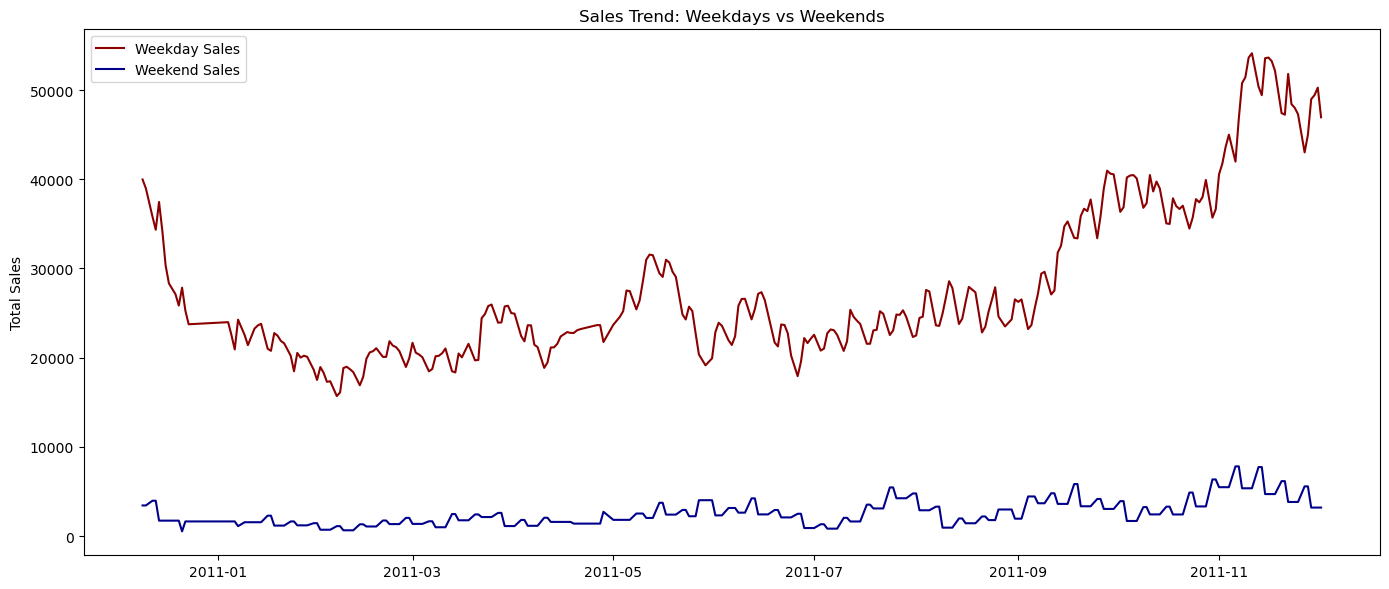

In [61]:
# Plot lines to compare between sales on weekends (Saturday, Sunday) and normal days (Weekdays)
# Extract date-only column for InvoiceDate
df_zscore['Date'] = df_zscore['InvoiceDate'].dt.date

# Identify weekends
df_zscore['DayType'] = df_zscore['DayOfWeek'].apply(lambda x: 'Weekend' if x in ['Sat', 'Sun'] else 'Weekday')

# Aggregate daily sales by DayType
daily_sales = df_zscore.groupby(['Date', 'DayType'])['TotalPrice'].sum().reset_index()

# Create pivot table for easier plotting
pivot_df = daily_sales.pivot(index='Date', columns='DayType', values='TotalPrice')
pivot_df = pivot_df.fillna(0)

# Apply rolling average for smoothing
pivot_df['Weekday_Smoothed'] = pivot_df['Weekday'].rolling(window=14, center=True).mean()
pivot_df['Weekend_Smoothed'] = pivot_df['Weekend'].rolling(window=14, center=True).mean()

# Plot smoothed lines
plt.figure(figsize=(14,6))
plt.plot(pivot_df.index, pivot_df['Weekday_Smoothed'], label='Weekday Sales', color='darkred')
plt.plot(pivot_df.index, pivot_df['Weekend_Smoothed'], label='Weekend Sales', color='darkblue')

# Set title and labels
plt.title('Sales Trend: Weekdays vs Weekends')
plt.xlabel('')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()

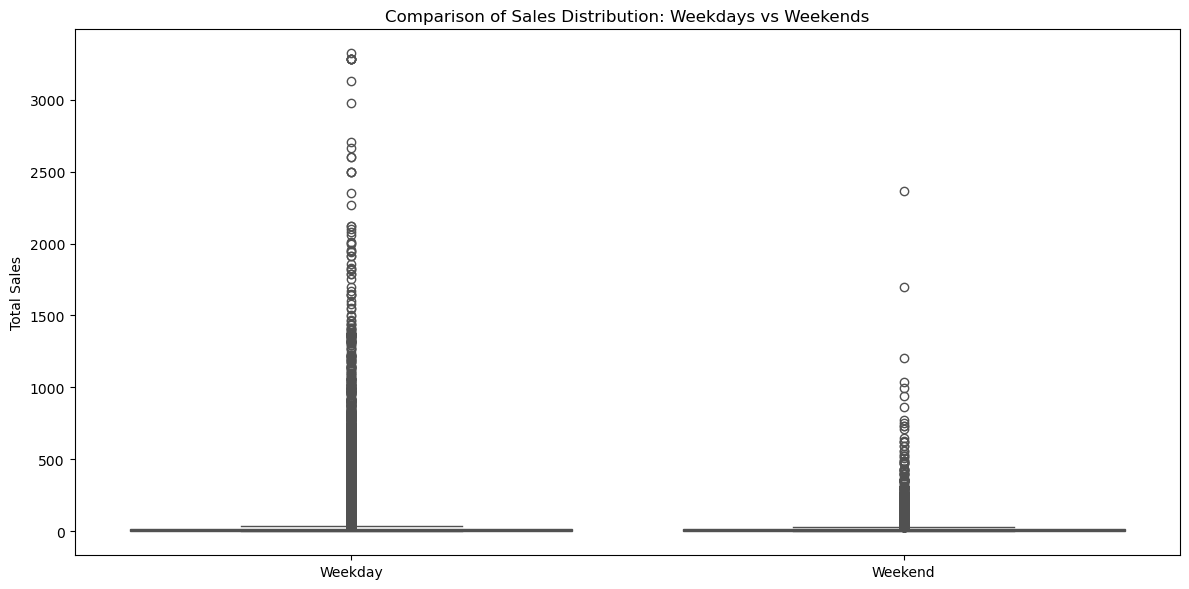

In [62]:
# Plot a boxplot to compare the sales distribution between weekdays and weekends
# Extract DayType and TotalPrice for boxplot
boxplot_data = df_zscore[['DayType', 'TotalPrice']]

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=boxplot_data, x='DayType', y='TotalPrice', palette=['#3498db', '#e74c3c'])

# Set title and labels
plt.title('Comparison of Sales Distribution: Weekdays vs Weekends')
plt.xlabel('')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

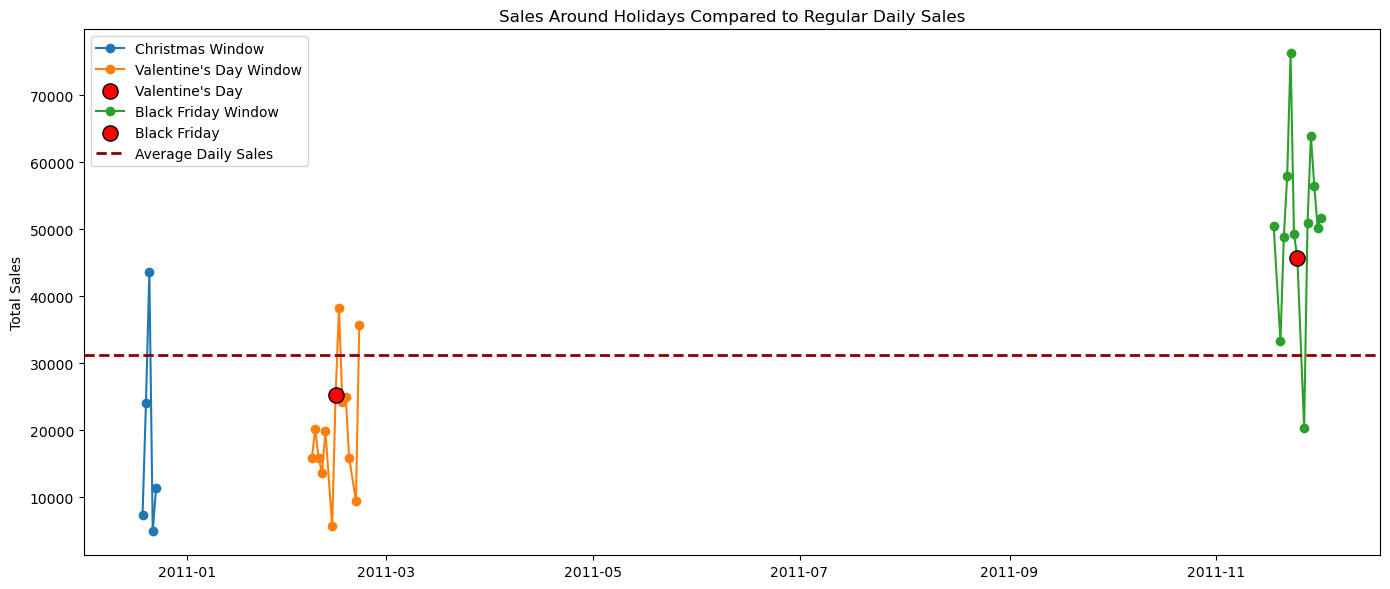

In [63]:
# Plot sales trends to find the effect of holidays on sales
# Define holiday dates
holiday_dates = {
    'Christmas': pd.to_datetime('2010-12-25'),
    'Valentine\'s Day': pd.to_datetime('2011-02-14'),
    'Black Friday': pd.to_datetime('2011-11-25')
}

# Group total sales by day
daily_sales = df_zscore.groupby('Date')['TotalPrice'].sum().reset_index()
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])

# Calculate average daily sales (for all regular days)
avg_daily_sales = daily_sales['TotalPrice'].mean()

# Plot sales trends around holidays and compare with average
plt.figure(figsize=(14, 6))
for holiday_name, holiday_date in holiday_dates.items():
    window_start = holiday_date - pd.Timedelta(days=7)
    window_end = holiday_date + pd.Timedelta(days=7)

    sales_window = daily_sales[
        (daily_sales['Date'] >= window_start) &
        (daily_sales['Date'] <= window_end)
    ]

    plt.plot(sales_window['Date'],
             sales_window['TotalPrice'],
             marker='o',
             label=f"{holiday_name} Window")

    # Highlight the exact holiday point
    exact_point = sales_window[daily_sales['Date'] == holiday_date]
    if not exact_point.empty:
        plt.scatter(holiday_date,
                    exact_point['TotalPrice'].values[0],
                    color='red',
                    s=120,
                    edgecolors='black',
                    zorder=5,
                    label=f"{holiday_name}")

# Plot average daily sales as a horizontal line
plt.axhline(y=avg_daily_sales, color='darkred', linestyle='--', linewidth=2, label='Average Daily Sales')

# Set title and labels
plt.title('Sales Around Holidays Compared to Regular Daily Sales')
plt.xlabel('')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()

<hr>
<div id="feature_engineering"> 
    <h2>Feature Engineering</h2>    
</div>
<div>
    <ol>
        <li><a href="#create_new_features">Create New Features</a></li>
        <li><a href="#feature_encoding">Feature Encoding</a></li>          
        <li><a href="#feature_scaling">Feature Scaling</a></li>
    </ol>
</div>
<br>

<hr>
<div id="create_new_features"> 
    <h2>Create New Features</h2>    
</div>
<div>
    <ol>
        <li><a href="#total_price">Total Price Calculation</a></li>  
        <li><a href="#customer_behavior">Customer Behavior Analysis</a></li> 
        <li><a href="#product_popularity">Product Popularity Analysis</a></li>
        <li><a href="#time_based">Time-based Analysis</a></li>
        <li><a href="#location_based_features">Location-Based Features</a></li>
        <li><a href="#lag_features">Lag Features</a></li>       
    </ol>
</div>
<br>

<div id="total_price"> 
    <h2>Total Price Calculation</h2>    
</div>

[Go to Total Price Calculation](#total_price)

<div id="customer_behavior"> 
    <h2>Customer Behavior Analysis</h2>    
</div>

In [64]:
# Customer-Level Features
# Aggregating customer data to extract relevant features
customer_features = df_zscore.groupby('CustomerID').agg(
    total_purchases=('InvoiceNo', 'nunique'),       # Number of unique purchases
    total_spent=('TotalPrice', 'sum'),              # Total money spent
    avg_spent_per_purchase=('TotalPrice', 'mean'),  # Average amount spent per purchase
    first_purchase_date=('InvoiceDate', 'min'),     # First purchase date
    last_purchase_date=('InvoiceDate', 'max'),      # Last purchase date
    unique_items_bought=('StockCode', 'nunique'),   # Number of unique items purchased
    avg_items_per_invoice=('Quantity', 'mean')      # Average number of items per invoice
).reset_index()

# Create purchase span (days between first and last purchase)
customer_features['purchase_span'] = (customer_features['last_purchase_date'] - customer_features['first_purchase_date']).dt.days

# Drop the first and last purchase date columns 
customer_features.drop(columns=['first_purchase_date', 'last_purchase_date'], inplace=True)

# Display the result
print("\nEnhanced Customer-Level Features:\n")
display(customer_features.head())


Enhanced Customer-Level Features:



,CustomerID,total_purchases,total_spent,avg_spent_per_purchase,unique_items_bought,avg_items_per_invoice,purchase_span
0,12346.0,0,0.00,NaN,0,NaN,NaN
1,12347.0,7,4310.00,23.681319,103,13.505495,365.0
2,12348.0,5,3150.16,15.366634,193,13.385366,282.0
3,12349.0,1,1457.55,20.243750,72,8.750000,0.0
4,12350.0,1,334.40,19.670588,17,11.588235,0.0


<div id="product_popularity"> 
    <h2>Product Popularity Analysis</h2>    
</div>

In [65]:
# Product-Level Features
# Aggregating product data to extract sales-related insights
product_features = df_zscore.groupby('StockCode').agg(
    total_sales=('Quantity', 'sum'),                # Total quantity sold
    avg_price=('UnitPrice', 'mean'),                # Average price of product    
    revenue_generated=('TotalPrice', 'sum'),        # Total revenue generated by product
    avg_quantity_per_invoice=('Quantity', 'mean'),  # Average quantity sold per invoice
    purchase_count=('InvoiceNo', 'nunique'),        # Number of unique purchases
    unique_buyers=('CustomerID', 'nunique')         # Number of unique customers who bought the product
).reset_index()

# Display the output 
print("\nProduct-Level Features:\n")
display(product_features.head())


Product-Level Features:



,StockCode,total_sales,avg_price,revenue_generated,avg_quantity_per_invoice,purchase_count,unique_buyers
0,10002,860,1.086620,759.89,12.112676,71,59
1,10080,303,0.410909,119.09,13.772727,22,20
2,10120,192,0.210000,40.32,6.620690,29,25
3,10125,1295,0.859785,993.99,13.924731,91,76
4,10133,2856,0.652551,1539.60,14.571429,196,159


<div id="time_based"> 
    <h2>Time-based Analysis</h2>    
</div>

[Go to Hour & DayOfWeek Extraction](#hourdayofweek_extraction)

[Go to Season Extraction](#season_extraction)

[Go to DayType (Weekdays and Weekends) Extraction](#daytype_extraction)

In [66]:
# Time-Based Features
# Aggregating time-based sales insights
time_features = df_zscore.groupby('DayOfWeek').agg(
    total_sales=('Quantity', 'sum'),              # Total quantity sold per day
    total_revenue=('TotalPrice', 'sum'),          # Total revenue per day
    transaction_count=('InvoiceNo', 'nunique'),   # Number of unique transactions per day
    avg_sales=('Quantity', 'mean'),               # Average quantity sold per invoice
    avg_revenue=('TotalPrice', 'mean'),           # Average revenue per transaction
    avg_price_per_item=('UnitPrice', 'mean')      # Average unit price per item sold
).reset_index()

# Display the output
print("\nTime-Based Features:\n")
display(time_features.head())


Time-Based Features:



,DayOfWeek,total_sales,total_revenue,transaction_count,avg_sales,avg_revenue,avg_price_per_item
0,Fri,754616,1532737.741,3105,9.494414,19.284571,3.459475
1,Mon,815879,1618942.111,3080,8.847957,17.556930,3.422698
2,Sun,448126,797032.291,2201,7.192226,12.792018,2.805289
3,Thu,1086759,2012818.540,4208,10.873353,20.138859,3.260589
4,Tue,934740,1857585.291,3514,9.499294,18.877707,3.470255


<div id="location_based_features"> 
    <h2>Location-Based Features</h2>    
</div>

In [67]:
# Country-Level Aggregates
# Aggregating customer activity and sales metrics by country
location_features = df_zscore.groupby('Country').agg(
    total_orders=('InvoiceNo', 'nunique'),            # Number of unique orders from the country
    total_customers=('CustomerID', 'nunique'),        # Number of unique customers in the country
    total_quantity=('Quantity', 'sum'),               # Total number of items sold
    total_revenue=('TotalPrice', 'sum'),              # Total revenue from the country
    avg_order_value=('TotalPrice', 'mean'),           # Average value per order
    avg_items_per_order=('Quantity', 'mean')          # Average number of items per order
).reset_index()

# Display the output
print("\nLocation-Based Features:\n")
display(location_features.sort_values(by='total_revenue', ascending=False).head())


Location-Based Features:



,Country,total_orders,total_customers,total_quantity,total_revenue,avg_order_value,avg_items_per_order
36,United Kingdom,17862,3991,4105975,7998822.104,16.705768,8.575446
10,EIRE,284,22,143461,274810.660,34.923200,18.231160
24,Netherlands,90,9,187225,269869.380,115.033836,79.806053
14,Germany,452,94,118546,225100.070,24.966734,13.148403
13,France,386,90,110562,196690.270,23.465792,13.190408


<div id="lag_features"> 
    <h2>Lag Features</h2>    
</div>

In [68]:
# Create lag features for 'TotalPrice' to capture purchase patterns over time
df_zscore['TotalPrice_Lag1'] = df_zscore['TotalPrice'].shift(1)         # 1-day lag (moves the values down by 1 row)
df_zscore['TotalPrice_Lag7'] = df_zscore['TotalPrice'].shift(7)         # 1-week lag

* Handling Missing Values for Lag Features

In [69]:
# Since .shift() creates NaN values, must handle them:
df_zscore[['TotalPrice_Lag1', 'TotalPrice_Lag7']] = df_zscore[['TotalPrice_Lag1', 'TotalPrice_Lag7']].fillna(0)

In [70]:
# Display the output
display(df_zscore.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,InvoiceWeek,CohortMonth,CohortIndex,Hour,DayOfWeek,Season,Date,DayType,TotalPrice_Lag1,TotalPrice_Lag7
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30,2010-11-29,2010-12-01,1,8,Wed,Winter,2010-12-01,Weekday,0.00,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-11-29,2010-12-01,1,8,Wed,Winter,2010-12-01,Weekday,15.30,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00,2010-11-29,2010-12-01,1,8,Wed,Winter,2010-12-01,Weekday,20.34,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-11-29,2010-12-01,1,8,Wed,Winter,2010-12-01,Weekday,22.00,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-11-29,2010-12-01,1,8,Wed,Winter,2010-12-01,Weekday,20.34,0.0


<hr>
<div id="feature_encoding"> 
    <h2>Feature Encoding</h2>    
</div>
<div>
    <ol>
        <li><a href="#one_hot">One-hot Encoding</a></li>                      
    </ol>
</div>
<br>

<div id="one_hot"> 
    <h2>One-hot Encoding</h2>    
</div>

In [71]:
# Convert (encode) categorical features into numerical representations
# Create a copy of the original dataset for encoding
df_encoded = df_zscore.copy()

# Display the types of categorical columns to be encoded
print("Categorical columns to be encoded:")
print(df_encoded.select_dtypes(include=['category']).columns)

Categorical columns to be encoded:
Index(['StockCode', 'Description', 'CustomerID', 'Country'], dtype='object')


In [72]:
# Apply one-hot encoding to categorical columns
# Select low-cardinality categorical columns to one-hot encode
columns_to_encode = ['Country']

""" drop_first=True removes one dummy variable (binary 0/1 column) per categorical feature to
    avoid multicollinearity in linear models (e.g., Logistic Regression)"""  
# Perform one-hot encoding 
encoded_cols = pd.get_dummies(df_encoded[columns_to_encode], drop_first=True)

In [73]:
# Concatenate encoded columns with original dataset
df_encoded = pd.concat([df_encoded.drop(columns=columns_to_encode), encoded_cols], axis=1)

# Display the shape and first few rows of the encoded dataset
print(f"Encoded dataset shape: {df_encoded.shape}")
display(df_encoded.head())

Encoded dataset shape: (523577, 56)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceMonth,TotalPrice,InvoiceWeek,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,2010-12-01,15.30,2010-11-29,...,False,False,False,False,False,False,False,False,True,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,2010-12-01,20.34,2010-11-29,...,False,False,False,False,False,False,False,False,True,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,2010-12-01,22.00,2010-11-29,...,False,False,False,False,False,False,False,False,True,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,2010-12-01,20.34,2010-11-29,...,False,False,False,False,False,False,False,False,True,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,2010-12-01,20.34,2010-11-29,...,False,False,False,False,False,False,False,False,True,False


<hr>
<div id="feature_scaling"> 
    <h2>Feature Scaling</h2>    
</div>
<div>
    <ol>
        <li><a href="#standard_scaling">Standard Scaling</a></li>                      
    </ol>
</div>
<br>

<div id="standard_scaling"> 
    <h2>Standard Scaling</h2>    
</div>

In [74]:
# Select only the numeric columns to scale
cols_to_scale = ['Quantity', 'UnitPrice', 'TotalPrice']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the selected numeric features (mean=0, std=1)
df_scaled_numeric = scaler.fit_transform(df_encoded[cols_to_scale])

In [75]:
# Convert back to DataFrame to keep column names
df_scaled_numeric = pd.DataFrame(df_scaled_numeric, columns=cols_to_scale, index=df_encoded.index)
display(df_scaled_numeric.head())

,Quantity,UnitPrice,TotalPrice
0,-0.159691,-0.194779,-0.061114
1,-0.159691,0.020732,0.043857
2,-0.068911,-0.143467,0.078430
3,-0.159691,0.020732,0.043857
4,-0.159691,0.020732,0.043857


In [76]:
# Drop original unscaled columns and replace them with scaled versions
df_encoded_scaled = df_encoded.drop(columns=cols_to_scale).copy()
df_encoded_scaled[cols_to_scale] = df_scaled_numeric

# Display final shape and a preview of the scaled dataset
print(f"Final dataset shape after scaling: {df_encoded_scaled.shape}\n")
print("Preview of the final dataset:\n")
display(df_encoded_scaled.head())

Final dataset shape after scaling: (523577, 56)

Preview of the final dataset:



,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,InvoiceMonth,InvoiceWeek,CohortMonth,CohortIndex,Hour,...,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Quantity,UnitPrice,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,17850.0,2010-12-01,2010-11-29,2010-12-01,1,8,...,False,False,False,False,False,True,False,-0.159691,-0.194779,-0.061114
1,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,17850.0,2010-12-01,2010-11-29,2010-12-01,1,8,...,False,False,False,False,False,True,False,-0.159691,0.020732,0.043857
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,17850.0,2010-12-01,2010-11-29,2010-12-01,1,8,...,False,False,False,False,False,True,False,-0.068911,-0.143467,0.078430
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,17850.0,2010-12-01,2010-11-29,2010-12-01,1,8,...,False,False,False,False,False,True,False,-0.159691,0.020732,0.043857
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,17850.0,2010-12-01,2010-11-29,2010-12-01,1,8,...,False,False,False,False,False,True,False,-0.159691,0.020732,0.043857
